In [1]:
import pandas as pd

# Replace 'your_file_path.txt' with the actual path to your text file
file_path = r'D:\python\DATAS\lumin\00000001.txt'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path, comment='#', delim_whitespace=True, header=None,
                 names=['N', 'V', 'wl(nm)', 'I(wl)', 'E(eV)', 'I(E)'])

# Display the DataFrame
df


N     V       wl(nm)         I(wl)     E(eV)          I(E)
0        0  4102   199.418634   -245.746467  6.217282 -7.882399e+03
1        1  3126   199.895625  -1218.292857  6.202446 -3.926549e+04
2        2  3130   200.372588  -1214.308155  6.187682 -3.932131e+04
3        3  3136   200.849524  -1208.331086  6.172989 -3.931546e+04
4        4  3963   201.326432   -384.294291  6.158366 -1.256361e+04
...    ...   ...          ...           ...       ...           ...
2063  2063  4085  1123.230414 -15606.185280  1.103818 -1.588063e+07
2064  2064  4085  1123.648034 -15605.823290  1.103408 -1.589214e+07
2065  2065  4085  1124.065624 -15605.451056  1.102998 -1.590365e+07
2066  2066  4085  1124.483183 -15605.077770  1.102588 -1.591487e+07
2067  2067  4085  1124.900713 -15604.685571  1.102179 -1.592636e+07

[2068 rows x 6 columns]

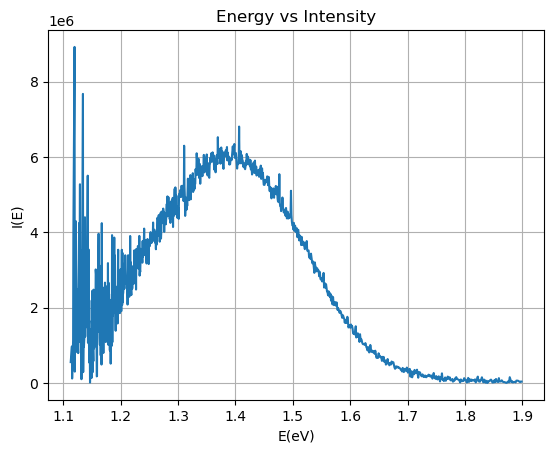

In [5]:
import matplotlib.pyplot as plt
# Plot the reversed columns
filtered_df = df[(df['E(eV)'] >= 1.1) & (df['E(eV)'] <= 1.9) & (df['I(E)'] > 0) ]

# Plot 'E(eV)' against 'I(E)'
plt.plot(filtered_df['E(eV)'], filtered_df['I(E)'])
plt.xlabel('E(eV)')
plt.ylabel('I(E)')
plt.title('Energy vs Intensity')
plt.grid(True)
plt.show()

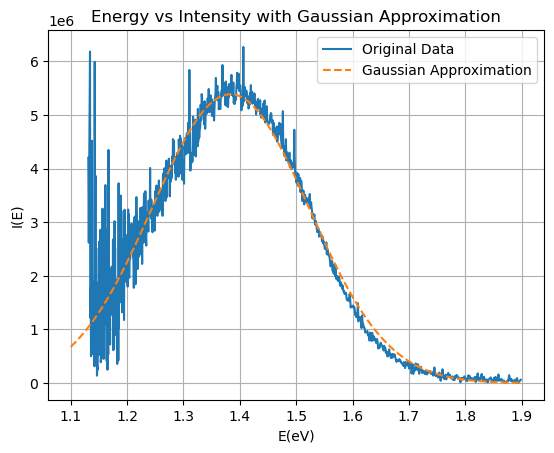

Optimized Parameters:
A: 5389561.69072616
B: 1.3836159802128778
C: 0.13917419341508816


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Read the dataset into a pandas DataFrame
df = pd.read_csv(r'D:\python\DATAS\lumin\00005001.txt', comment='#', delim_whitespace=True, header=None,
                 names=['N', 'V', 'wl(nm)', 'I(wl)', 'E(eV)', 'I(E)'])

# Filter the DataFrame based on the range of 'E(eV)'
filtered_df = df[(df['E(eV)'] >= 1.13) & (df['E(eV)'] <= 1.9) & (df['I(E)'] > 0) ]

# Define the Gaussian function
def gaussian(x, A, B, C):
    return A * np.exp(-((x - B)**2) / (2 * C**2))

# Initial guess for the parameters A, B, and C
initial_guess = [max(filtered_df['I(E)']), filtered_df['E(eV)'].mean(), 0.1]

# Fit the Gaussian function to the data
params, covariance = curve_fit(gaussian, filtered_df['E(eV)'], filtered_df['I(E)'], p0=initial_guess)

# Plot the original data
plt.plot(filtered_df['E(eV)'], filtered_df['I(E)'], label='Original Data')

# Plot the Gaussian approximation
x_range = np.linspace(1.1, 1.9, 100)
plt.plot(x_range, gaussian(x_range, *params), label='Gaussian Approximation', linestyle='--')

plt.xlabel('E(eV)')
plt.ylabel('I(E)')
plt.title('Energy vs Intensity with Gaussian Approximation')
plt.legend()
plt.grid(True)
plt.show()

# Display the optimized parameters A, B, and C
print('Optimized Parameters:')
print('A:', params[0])
print('B:', params[1])
print('C:', params[2])

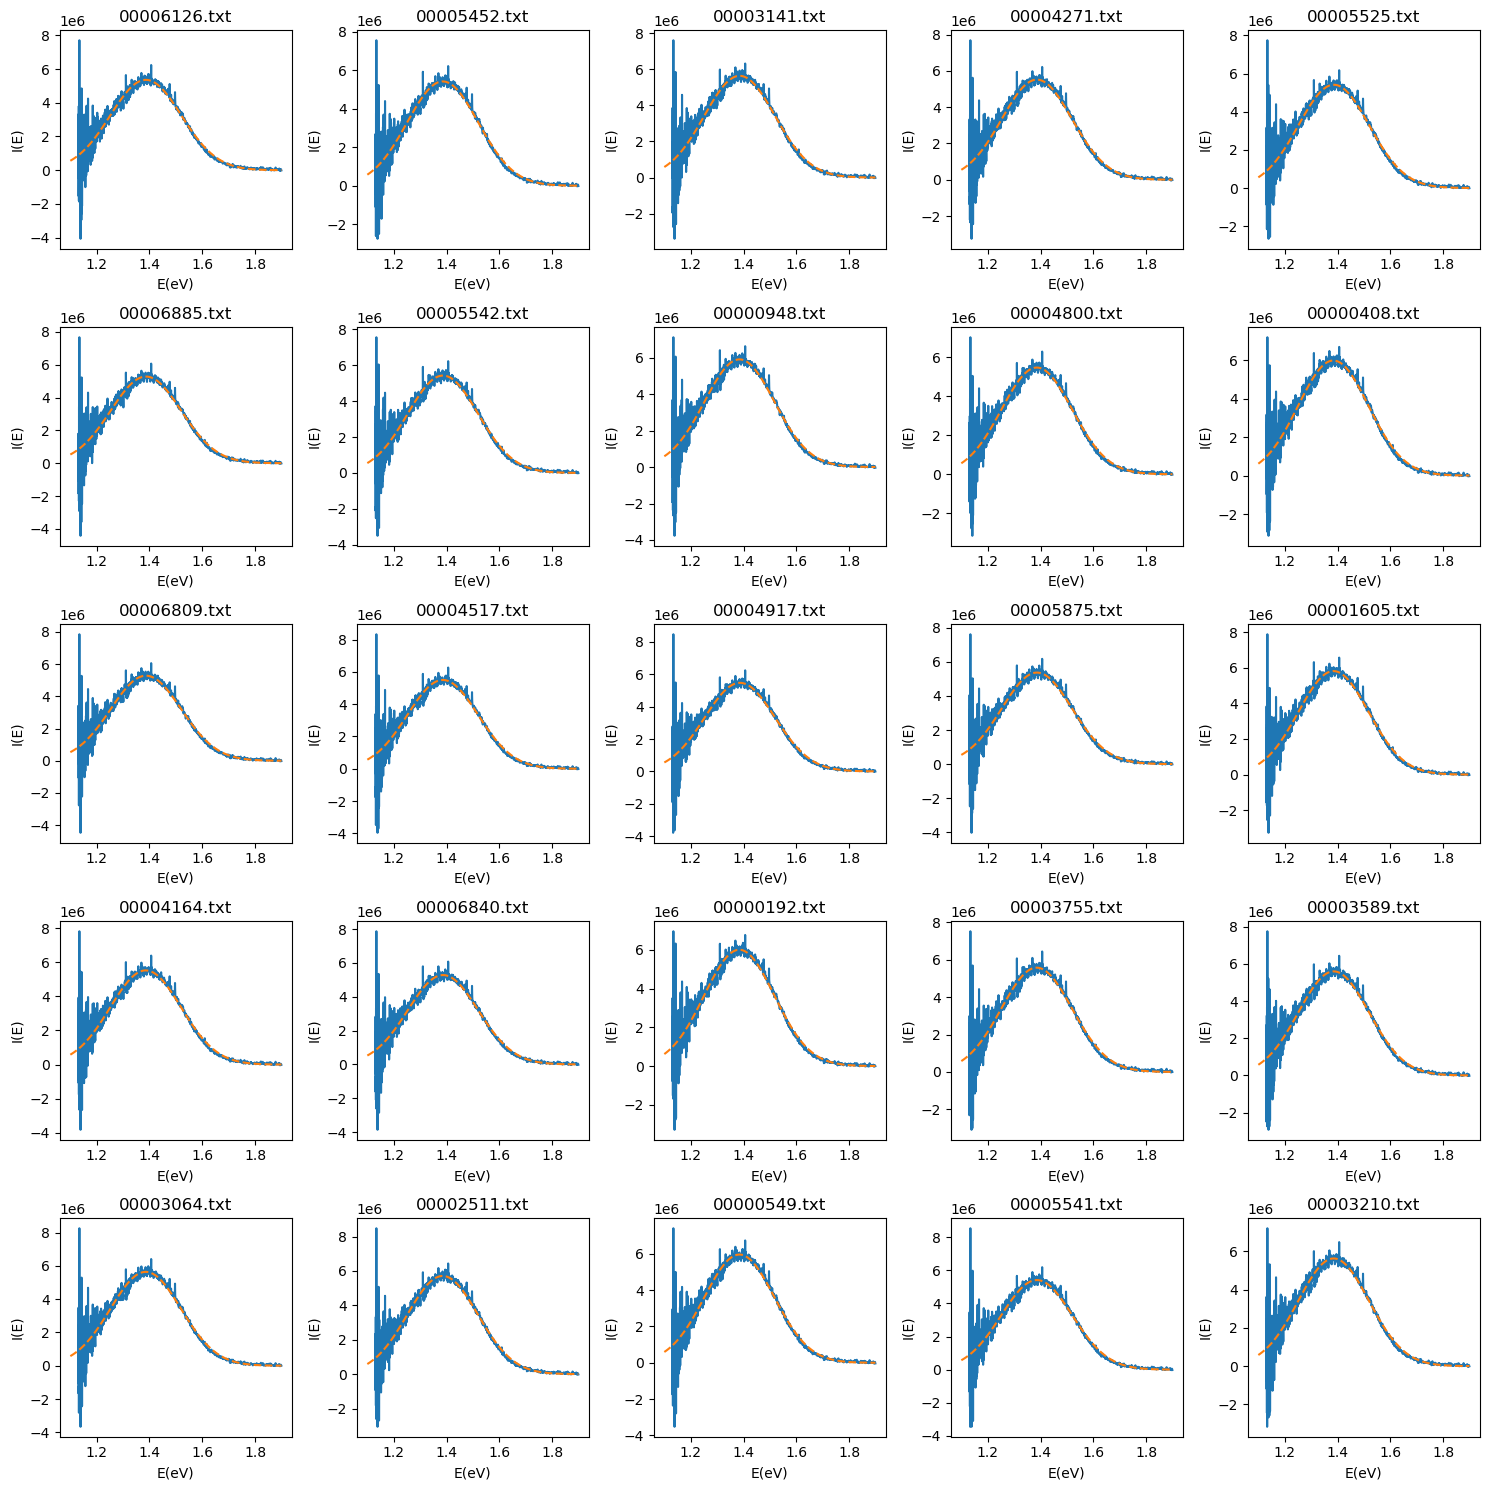

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def gaussian(x, A, B, C):
    return A * np.exp(-((x - B)**2) / (2 * C**2))

# Path to the folder containing your .txt files
folder_path = r'D:\python\DATAS\lumin'

# Get a list of all .txt files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Select 5x5 random files from the list
selected_files = np.random.choice(file_list, size=25, replace=False)

# Create a 5x5 subplot grid
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i, file_name in enumerate(selected_files):
    # Read the dataset into a pandas DataFrame
    df = pd.read_csv(os.path.join(folder_path, file_name), comment='#', delim_whitespace=True, header=None,
                     names=['N', 'V', 'wl(nm)', 'I(wl)', 'E(eV)', 'I(E)'])

    # Filter the DataFrame based on the range of 'E(eV)'
    filtered_df = df[(df['E(eV)'] >= 1.13) & (df['E(eV)'] <= 1.9)]

    # Initial guess for the parameters A, B, and C
    initial_guess = [max(filtered_df['I(E)']), filtered_df['E(eV)'].mean(), 0.1]

    # Fit the Gaussian function to the data
    params, _ = curve_fit(gaussian, filtered_df['E(eV)'], filtered_df['I(E)'], p0=initial_guess)

    # Plot the Gaussian approximation
    x_range = np.linspace(1.1, 1.9, 100)
    ax = axes[i // 5, i % 5]
    ax.plot(filtered_df['E(eV)'], filtered_df['I(E)'], label='Original Data')
    ax.plot(x_range, gaussian(x_range, *params), label=f'Gaussian Approximation\nA={params[0]:.2f}, B={params[1]:.2f}, C={params[2]:.2f}', linestyle='--')

    ax.set_xlabel('E(eV)')
    ax.set_ylabel('I(E)')
    ax.set_title(file_name)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def gaussian(x, A, B, C):
    return A * np.exp(-((x - B)**2) / (2 * C**2))

# Path to the folder containing your .txt files
folder_path = r'D:\python\DATAS\lumin'

# Get a list of all .txt files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Select 5x5 random files from the list
selected_files = np.random.choice(file_list, size=25, replace=False)

# Create a 5x5 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, file_name in enumerate(selected_files):
    # Read the dataset into a pandas DataFrame
    df = pd.read_csv(os.path.join(folder_path, file_name), comment='#', delim_whitespace=True, header=None,
                     names=['N', 'V', 'wl(nm)', 'I(wl)', 'E(eV)', 'I(E)'])

    # Filter the DataFrame based on the range of 'E(eV)' and 'I(E) > 0'
    filtered_df = df[(df['E(eV)'] >= 1.15) & (df['E(eV)'] <= 1.9) & (df['I(E)'] > 0)]

    if not filtered_df.empty:
        # Initial guess for the parameters A, B, and C
        initial_guess = [max(filtered_df['I(E)']), filtered_df['E(eV)'].mean(), 0.1]

        # Fit the Gaussian function to the data
        params, _ = curve_fit(gaussian, filtered_df['E(eV)'], filtered_df['I(E)'], p0=initial_guess)

        # Plot the Gaussian approximation
        x_range = np.linspace(1.1, 1.9, 100)
        ax = axes[i // 3, i % 3]
        ax.plot(filtered_df['E(eV)'], filtered_df['I(E)'])
        ax.plot(x_range, gaussian(x_range, *params), label=f'Gaussian Approximation\nA={params[0]:.2f},\n B={params[1]:.2f}, C={params[2]:.2f}', linestyle='--')

        ax.set_xlabel('E(eV)')
        ax.set_ylabel('I(E)')
        ax.legend()
        ax.set_title(file_name)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np

def gaussian(x, A, B, C):
    return A * np.exp(-((x - B)**2) / (2 * C**2))

# Path to the folder containing your .txt files
folder_path = r'D:\python\DATAS\lumin'

# Get a list of all .txt files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Filename', 'A', 'B', 'C'])

# Process each file
for file_name in file_list:
    try:
        # Read the dataset into a pandas DataFrame
        df = pd.read_csv(os.path.join(folder_path, file_name), comment='#', delim_whitespace=True, header=None,
                         names=['N', 'V', 'wl(nm)', 'I(wl)', 'E(eV)', 'I(E)'])

        # Filter the DataFrame based on the range of 'E(eV)' and 'I(E) > 0'
        filtered_df = df[(df['E(eV)'] >= 1.15) & (df['E(eV)'] <= 1.9) & (df['I(E)'] > 0)]

        if not filtered_df.empty:
            # Initial guess for the parameters A, B, and C
            initial_guess = [max(filtered_df['I(E)']), filtered_df['E(eV)'].mean(), 0.1]

            # Fit the Gaussian function to the data
            params, _ = curve_fit(gaussian, filtered_df['E(eV)'], filtered_df['I(E)'], p0=initial_guess)

            # Append results to the DataFrame
            results_df = results_df.append({'Filename': file_name, 'A': params[0], 'B': params[1], 'C': params[2]}, ignore_index=True)

            # Print log
            print(f"Processed {file_name} - A: {params[0]:.2f}, B: {params[1]:.2f}, C: {params[2]:.2f}")
        else:
            print(f"No valid data points in {file_name}. Skipping.")
    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")

# Save results to a .csv file
results_df.to_csv('results_gauss.csv', index=False)

print("Processing completed. Results saved to results.csv.")

In [ ]:
import os
import pandas as pd

# Path to the folder containing your .txt files
folder_path = r'D:\python\DATAS\lumin'

# Get a list of all .txt files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Filename', 'Time'])

# Process each file
for file_name in file_list:
    try:
        # Read the first line of the file to extract time information
        with open(os.path.join(folder_path, file_name), 'r') as file:
            first_line = file.readline().strip()
            time_str = first_line.split('=')[-1].strip()

            # Convert time string to seconds
            time_seconds = float(time_str.split(' ')[0])

        # Append results to the DataFrame
        results_df = results_df.append({'Filename': file_name, 'Time': time_seconds}, ignore_index=True)

        # Print log
        print(f"Processed {file_name} - Time: {time_seconds:.6f} s")
    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")

# Save results to a .csv file
results_df.to_csv('results_time_only.csv', index=False)

print("Processing completed. Results saved to results_time_only.csv.")

In [38]:
time = pd.read_csv('results_time_only.csv')

In [39]:
time

Filename         Time
0     00000001.txt     0.036606
1     00000002.txt     0.536500
2     00000003.txt     1.036430
3     00000004.txt     1.536421
4     00000005.txt     2.036358
...            ...          ...
7175  00007176.txt  3587.154000
7176  00007177.txt  3587.656000
7177  00007178.txt  3588.161000
7178  00007179.txt  3588.654000
7179  00007180.txt  3589.154000

[7180 rows x 2 columns]

In [41]:
res['Time'] = time['Time']

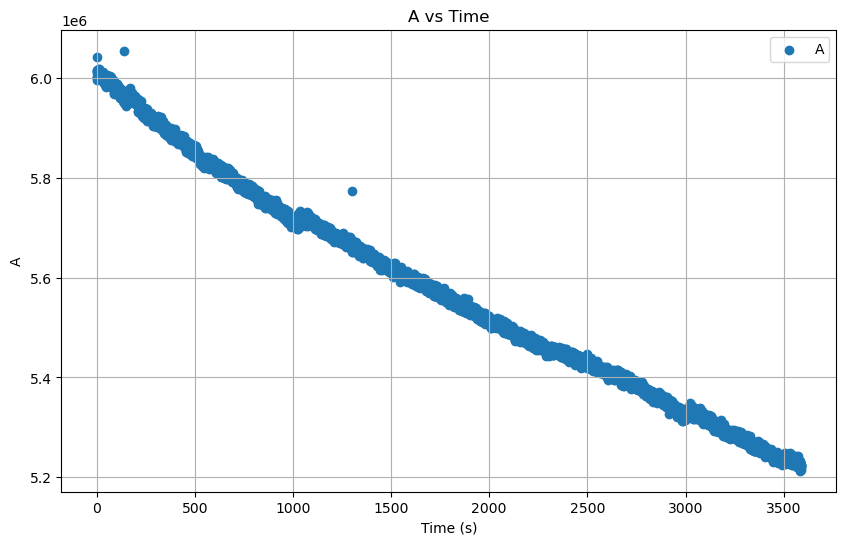

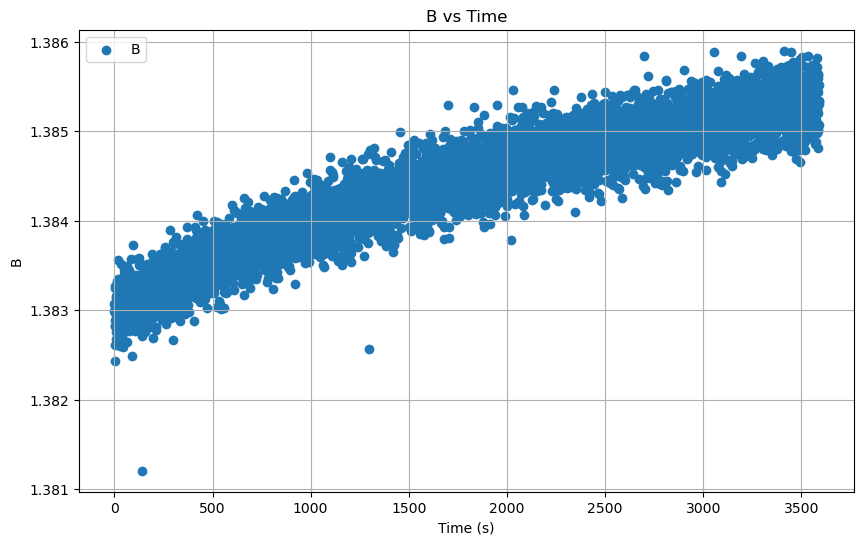

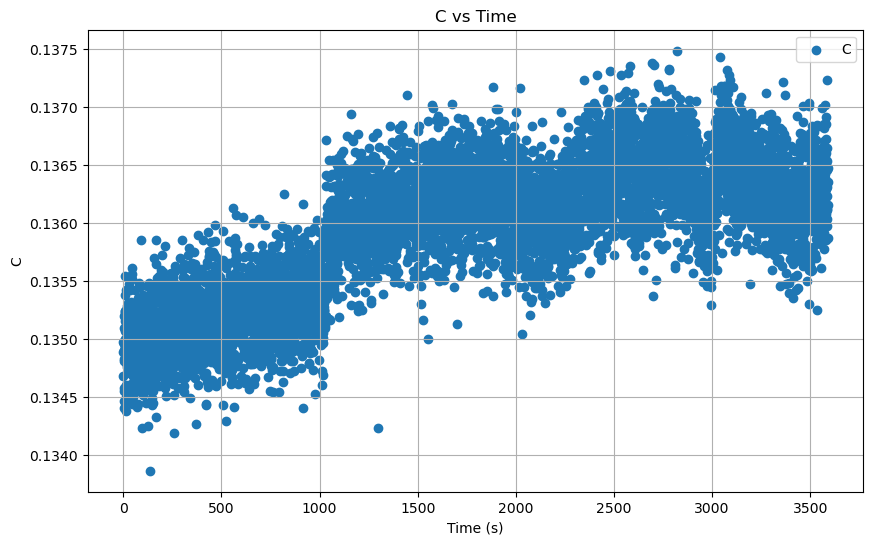

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the results_time_only.csv file into a pandas DataFrame
results_df = pd.read_csv('results_gauss.csv')

# Create separate figures for 'A', 'B', and 'C'
for param in ['A', 'B', 'C']:
    plt.figure(figsize=(10, 6))
    
    # Plot the parameter against 'Time'
    plt.scatter(results_df['Time'], results_df[param], label=param)
    
    plt.xlabel('Time (s)')
    plt.ylabel(param)
    plt.title(f'{param} vs Time')
    plt.legend()
    plt.grid(True)
    plt.show()


# Denoise

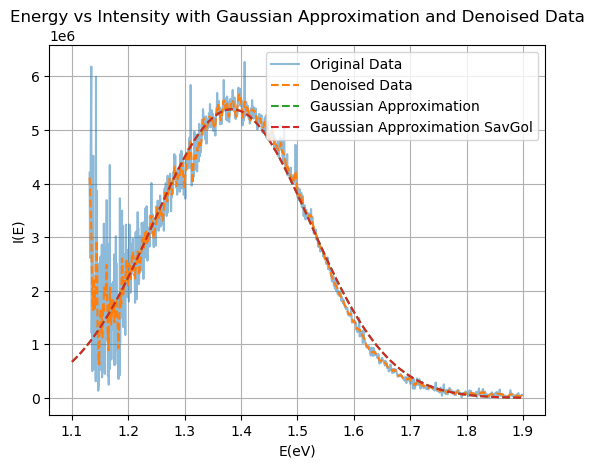

Optimized Parameters:
A: 5389561.69072616
B: 1.3836159802128778
C: 0.13917419341508816


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from scipy.signal import savgol_filter

# Read the dataset into a pandas DataFrame
df = pd.read_csv(r'D:\python\DATAS\lumin\00005001.txt', comment='#', delim_whitespace=True, header=None,
                 names=['N', 'V', 'wl(nm)', 'I(wl)', 'E(eV)', 'I(E)'])

# Filter the DataFrame based on the range of 'E(eV)'
filtered_df = df[(df['E(eV)'] >= 1.13) & (df['E(eV)'] <= 1.9) & (df['I(E)'] > 0) ]

# Denoise the data using a Savitzky-Golay filter
window_size = 11  # Choose an appropriate window size
order = 3  # Choose an appropriate polynomial order
filtered_intensity_savgol = savgol_filter(filtered_df['I(E)'], window_size, order)

# Define the Gaussian function
def gaussian(x, A, B, C):
    return A * np.exp(-((x - B)**2) / (2 * C**2))

# Initial guess for the parameters A, B, and C
initial_guess = [max(filtered_df['I(E)']), filtered_df['E(eV)'].mean(), 0.1]
initial_guess_savgol = [max(filtered_intensity_savgol), filtered_df['E(eV)'].mean(), 0.1]

# Fit the Gaussian function to the denoised data
params, _ = curve_fit(gaussian, filtered_df['E(eV)'], filtered_df['I(E)'], p0=initial_guess)
params_savgol, covariance_savgol = curve_fit(gaussian, filtered_df['E(eV)'], filtered_intensity_savgol, p0=initial_guess_savgol)

# Plot the original data and denoised data
plt.plot(filtered_df['E(eV)'], filtered_df['I(E)'], label='Original Data', alpha=0.5)
plt.plot(filtered_df['E(eV)'], filtered_intensity_savgol, label='Denoised Data', linestyle='--')

# Plot the Gaussian approximation
x_range = np.linspace(1.1, 1.9, 100)
plt.plot(x_range, gaussian(x_range, *params), label='Gaussian Approximation', linestyle='--')
plt.plot(x_range, gaussian(x_range, *params_savgol), label='Gaussian Approximation SavGol', linestyle='--')

plt.xlabel('E(eV)')
plt.ylabel('I(E)')
plt.title('Energy vs Intensity with Gaussian Approximation and Denoised Data')
plt.legend()
plt.grid(True)
plt.show()

# Display the optimized parameters A, B, and C
print('Optimized Parameters:')
print('A:', params[0])
print('B:', params[1])
print('C:', params[2])


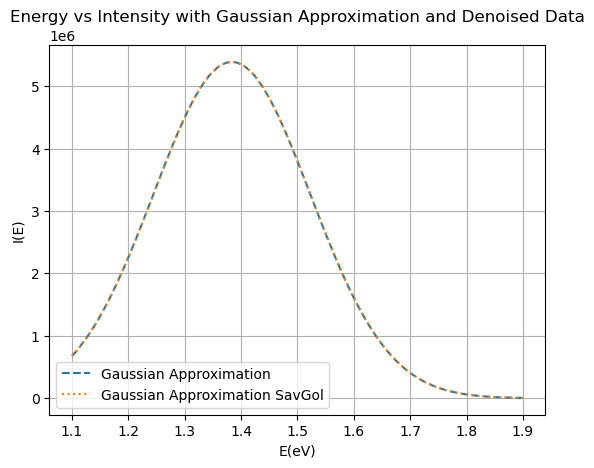

In [11]:
x_range = np.linspace(1.1, 1.9, 100)
plt.plot(x_range, gaussian(x_range, *params), label='Gaussian Approximation', linestyle='--')
plt.plot(x_range, gaussian(x_range, *params_savgol), label='Gaussian Approximation SavGol', linestyle=':')

plt.xlabel('E(eV)')
plt.ylabel('I(E)')
plt.title('Energy vs Intensity with Gaussian Approximation and Denoised Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from scipy.signal import savgol_filter

# Function to define the Gaussian
def gaussian(x, A, B, C):
    return A * np.exp(-((x - B)**2) / (2 * C**2))

# Function to process each file and save results to a DataFrame
def process_file(file_path):
    # Read the dataset into a pandas DataFrame
    df = pd.read_csv(file_path, comment='#', delim_whitespace=True, header=None,
                     names=['N', 'V', 'wl(nm)', 'I(wl)', 'E(eV)', 'I(E)'])

    # Filter the DataFrame based on the range of 'E(eV)' and 'I(E) > 0'
    filtered_df = df[(df['E(eV)'] >= 1.13) & (df['E(eV)'] <= 1.9) & (df['I(E)'] > 0)]

    # Denoise the data using a Savitzky-Golay filter
    window_size = 11  # Choose an appropriate window size
    order = 3  # Choose an appropriate polynomial order
    filtered_intensity = savgol_filter(filtered_df['I(E)'], window_size, order)

    # Initial guess for the parameters A, B, and C
    initial_guess = [max(filtered_intensity), filtered_df['E(eV)'].mean(), 0.1]

    try:
        # Fit the Gaussian function to the denoised data
        params, _ = curve_fit(gaussian, filtered_df['E(eV)'], filtered_intensity, p0=initial_guess)

        # Plot the original data and denoised data (optional)
        plt.plot(filtered_df['E(eV)'], filtered_df['I(E)'], label='Original Data', alpha=0.5)
        plt.plot(filtered_df['E(eV)'], filtered_intensity, label='Denoised Data', linestyle='--')

        # Plot the Gaussian approximation
        x_range = np.linspace(1.1, 1.9, 100)
        plt.plot(x_range, gaussian(x_range, *params), label='Gaussian Approximation', linestyle='--')

        plt.xlabel('E(eV)')
        plt.ylabel('I(E)')
        plt.title(f'Energy vs Intensity with Gaussian Approximation and Denoised Data - {os.path.basename(file_path)}')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Return the results
        return {'Filename': os.path.basename(file_path), 'A': params[0], 'B': params[1], 'C': params[2]}

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

# Folder path containing .txt files
folder_path = r'D:\python\DATAS\lumin'

# Get a list of all .txt files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Filename', 'A', 'B', 'C'])

# Process each file and append results to the DataFrame
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    result = process_file(file_path)
    if result:
        results_df = results_df.append(result, ignore_index=True)

# Save results to a .csv file
results_df.to_csv('results_denoised_summary.csv', index=False)

print("Processing completed. Results saved to results_denoised_summary.csv.")


In [ ]:
import os
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
from scipy.signal import savgol_filter

# Function to define the Gaussian
def gaussian(x, A, B, C):
    return A * np.exp(-((x - B)**2) / (2 * C**2))

# Function to process each file and save results to a DataFrame
def process_file(file_path):
    # Read the dataset into a pandas DataFrame
    df = pd.read_csv(file_path, comment='#', delim_whitespace=True, header=None,
                     names=['N', 'V', 'wl(nm)', 'I(wl)', 'E(eV)', 'I(E)'])

    # Filter the DataFrame based on the range of 'E(eV)' and 'I(E) > 0'
    filtered_df = df[(df['E(eV)'] >= 1.13) & (df['E(eV)'] <= 1.9) & (df['I(E)'] > 0)]

    # Denoise the data using a Savitzky-Golay filter
    window_size = 11  # Choose an appropriate window size
    order = 3  # Choose an appropriate polynomial order
    filtered_intensity = savgol_filter(filtered_df['I(E)'], window_size, order)

    # Initial guess for the parameters A, B, and C
    initial_guess = [max(filtered_intensity), filtered_df['E(eV)'].mean(), 0.1]

    try:
        # Fit the Gaussian function to the denoised data
        params, _ = curve_fit(gaussian, filtered_df['E(eV)'], filtered_intensity, p0=initial_guess)

        # Return the results
        return {'Filename': os.path.basename(file_path), 'A': params[0], 'B': params[1], 'C': params[2]}

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

# Folder path containing .txt files
folder_path = r'D:\python\DATAS\lumin'

# Get a list of all .txt files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Filename', 'A', 'B', 'C'])

# Process each file and append results to the DataFrame
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    result = process_file(file_path)
    if result:
        results_df = results_df.append(result, ignore_index=True)

# Save results to a .csv file
results_df.to_csv('results_denoised_summary.csv', index=False)

print("Processing completed. Results saved to results_summary.csv.")


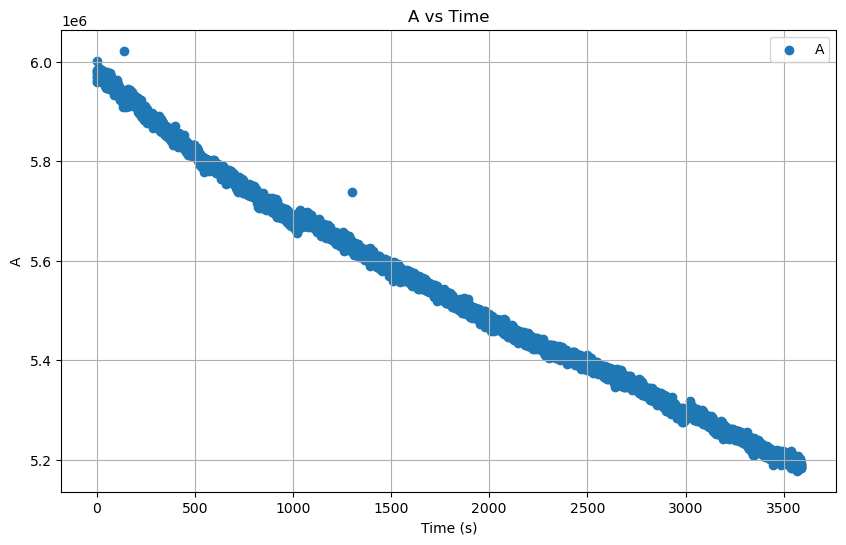

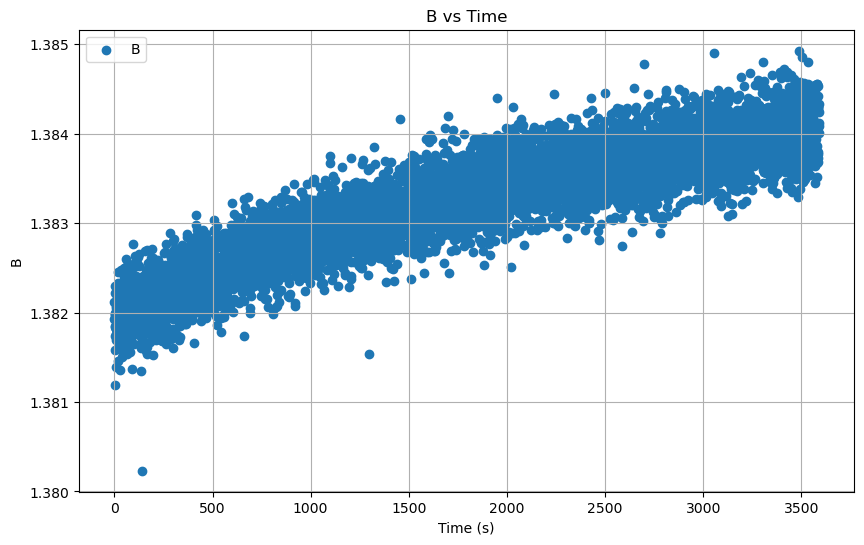

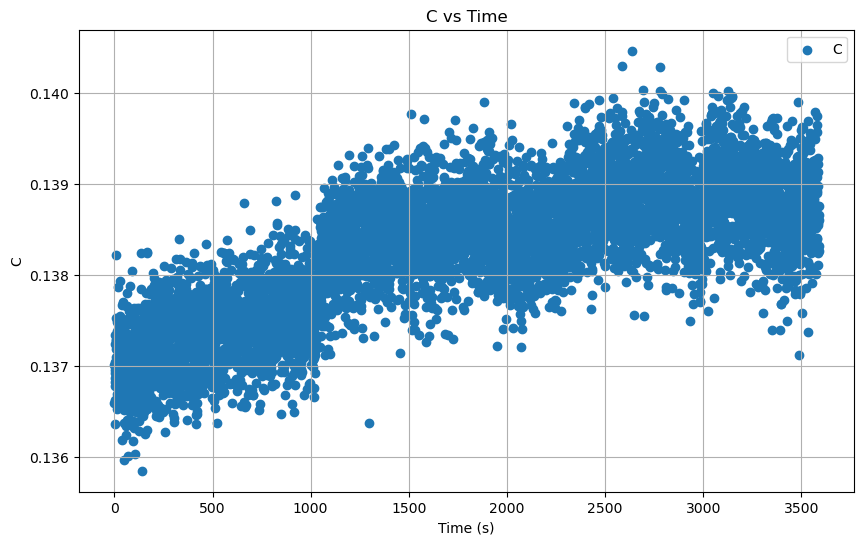

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the results_time_only.csv file into a pandas DataFrame
savgol = pd.read_csv('results_denoised_SavGol.csv')

# Create separate figures for 'A', 'B', and 'C'
for param in ['A', 'B', 'C']:
    plt.figure(figsize=(10, 6))
    
    # Plot the parameter against 'Time'
    plt.scatter(savgol['Time'], savgol[param], label=param)
    
    plt.xlabel('Time (s)')
    plt.ylabel(param)
    plt.title(f'{param} vs Time')
    plt.legend()
    plt.grid(True)
    plt.show()

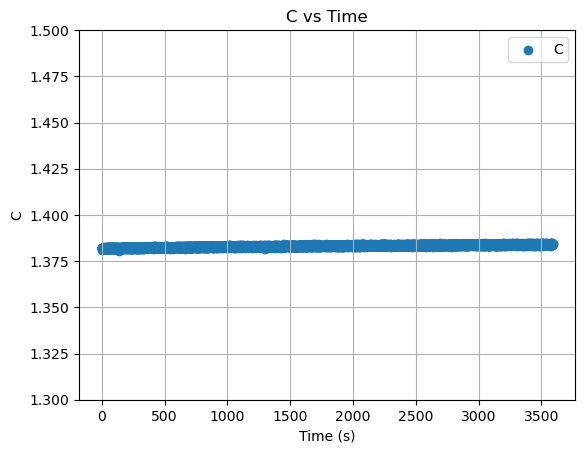

In [66]:
plt.scatter(savgol['Time'], savgol['B'], label=param)
    
plt.xlabel('Time (s)')
plt.ylabel(param)
plt.ylim([1.3, 1.5])
plt.title(f'{param} vs Time')
plt.legend()
plt.grid(True)
plt.show()

# Time Series

In [81]:
import pandas as pd
results_df = pd.read_csv('results_gauss.csv')

## PolynomialFeatures

Mean Squared Error:
38756017.63531441


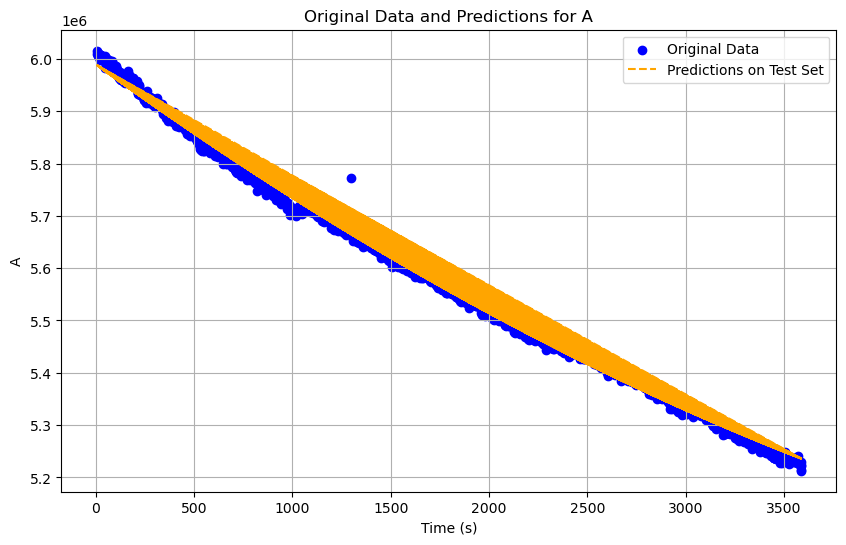

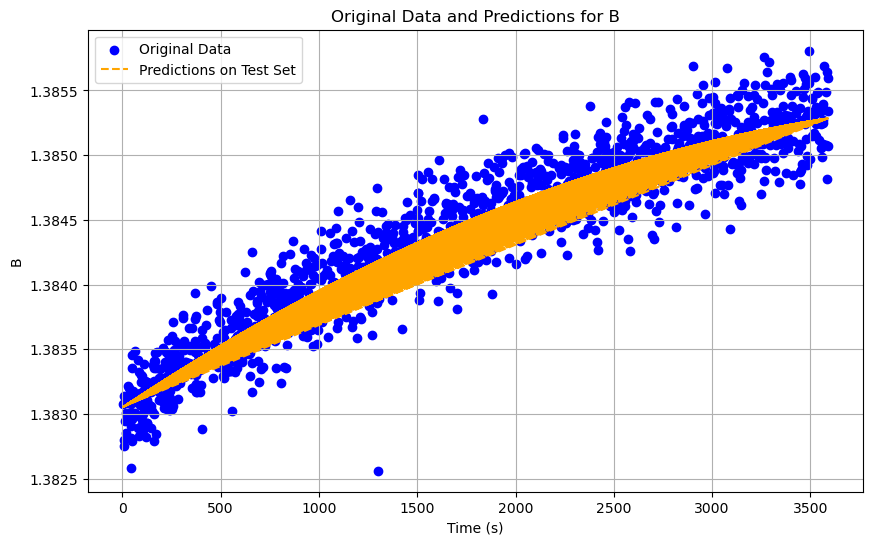

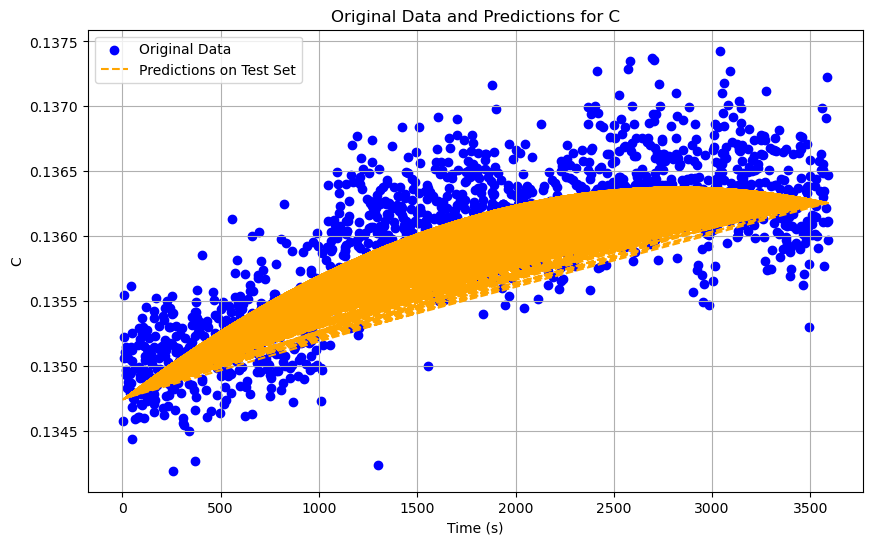

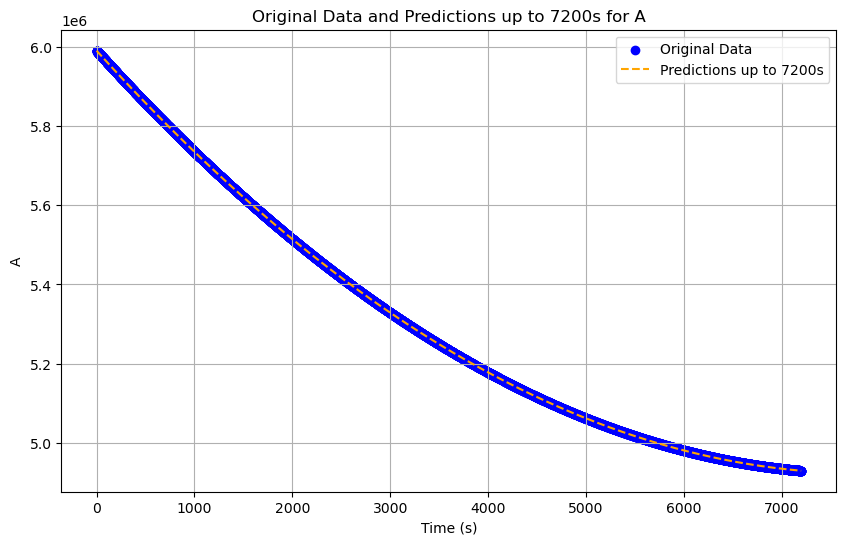

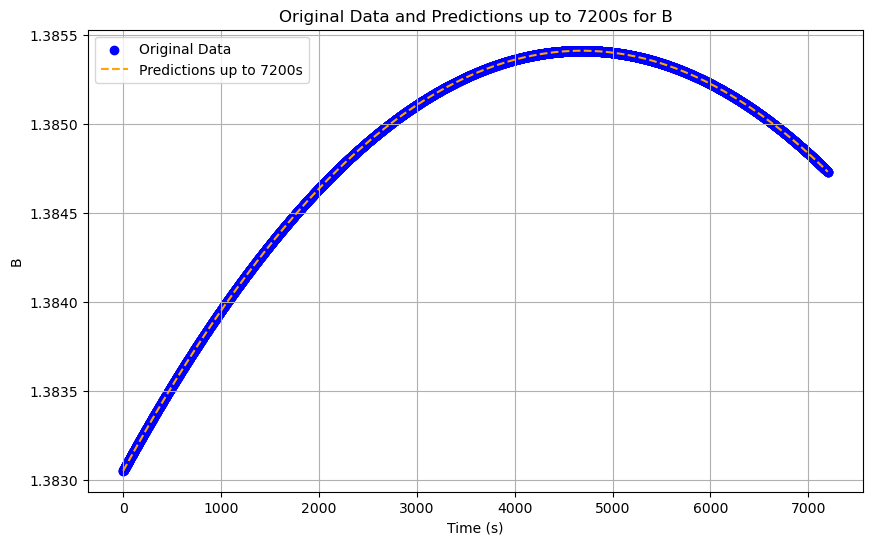

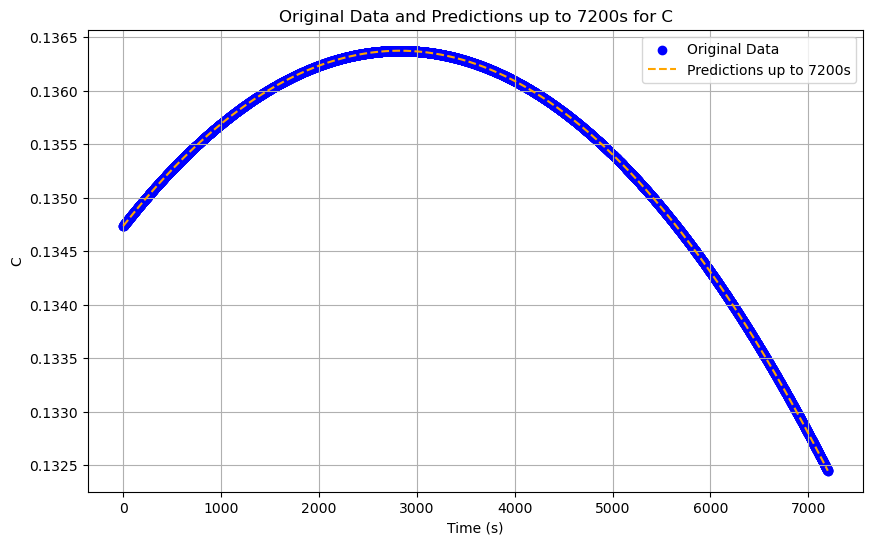

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

results_df = df

# Feature columns (excluding 'Time (s)')
features = df[['Time (s)']]

# Target columns (A, B, C)
targets = df[['A', 'B', 'C']]

# Split the data into training and testing sets (80% for training, 20% for testing)
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Train a Polynomial Regression model for each coefficient
models = {}
degree = 2  # Adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)

for target_column in targets.columns:
    # Transform features to polynomial features
    features_train_poly = poly.fit_transform(features_train)
    features_test_poly = poly.transform(features_test)
    
    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(features_train_poly, targets_train[target_column])
    models[target_column] = (model, poly)

# Evaluate the models on the test set
predictions = pd.DataFrame()

for target_column, (model, poly) in models.items():
    features_test_poly = poly.transform(features_test)
    predictions[target_column] = model.predict(features_test_poly)

# Calculate mean squared error for each target
mse = mean_squared_error(targets_test, predictions)
print(f'Mean Squared Error:\n{mse}')

# Train the models on the entire dataset up to 7200s
features_full = pd.DataFrame({'Time (s)': range(7201)})  # Assuming Time starts from 0
predictions_full = pd.DataFrame()

for target_column, (model, poly) in models.items():
    features_full_poly = poly.transform(features_full)
    predictions_full[target_column] = model.predict(features_full_poly)

# Add the predictions back to the original DataFrame
df_full = pd.concat([features_full, predictions_full], axis=1)

# Plot original data and predictions on the test set
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    plt.plot(features_test['Time (s)'], predictions[target_column], label='Predictions on Test Set', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot original data and predictions up to 7200s
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_full['Time (s)'], df_full[target_column], label='Original Data', color='blue')
    plt.plot(features_full['Time (s)'], predictions_full[target_column], label='Predictions up to 7200s', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions up to 7200s for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


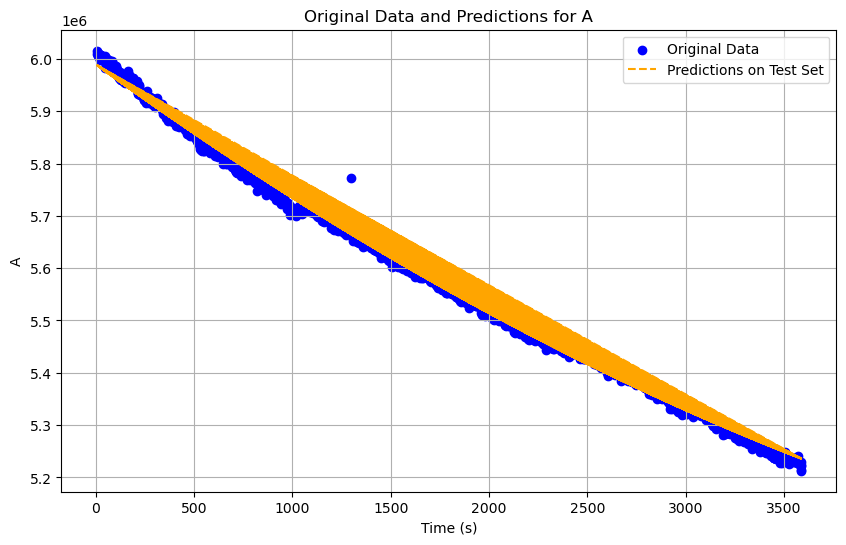

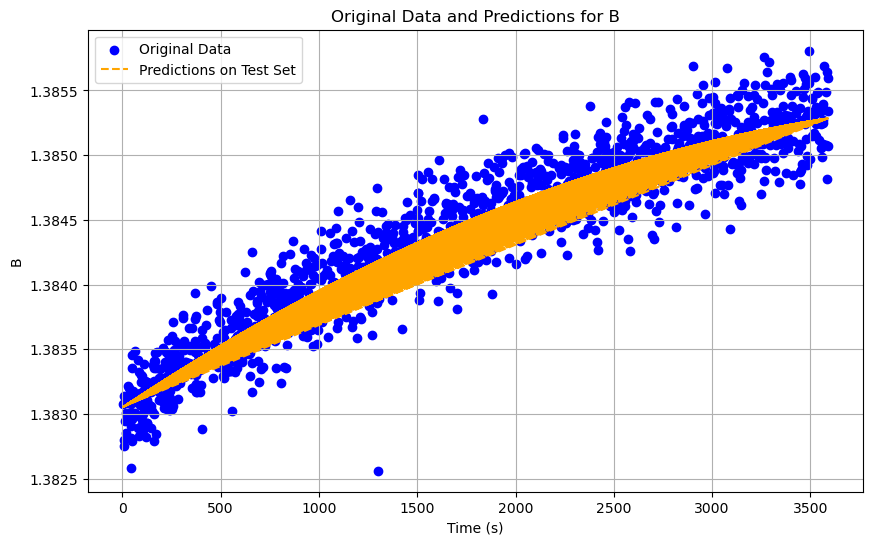

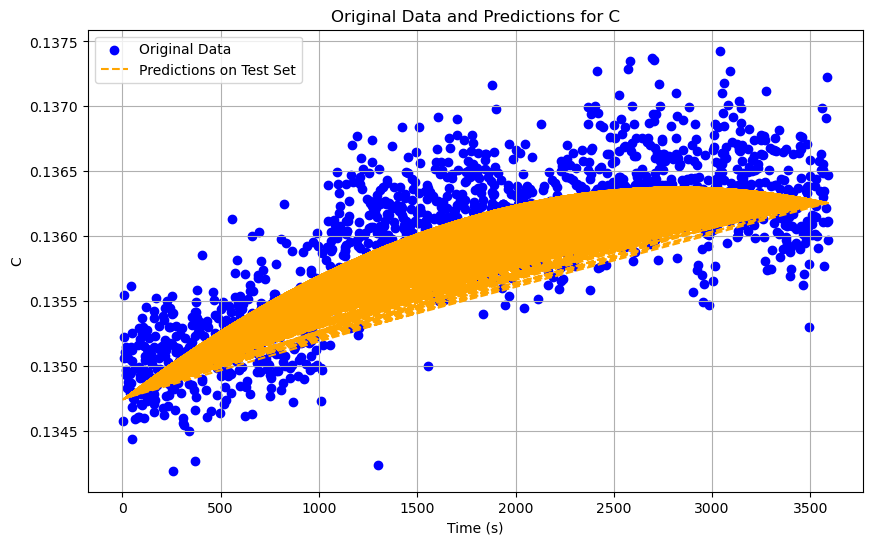

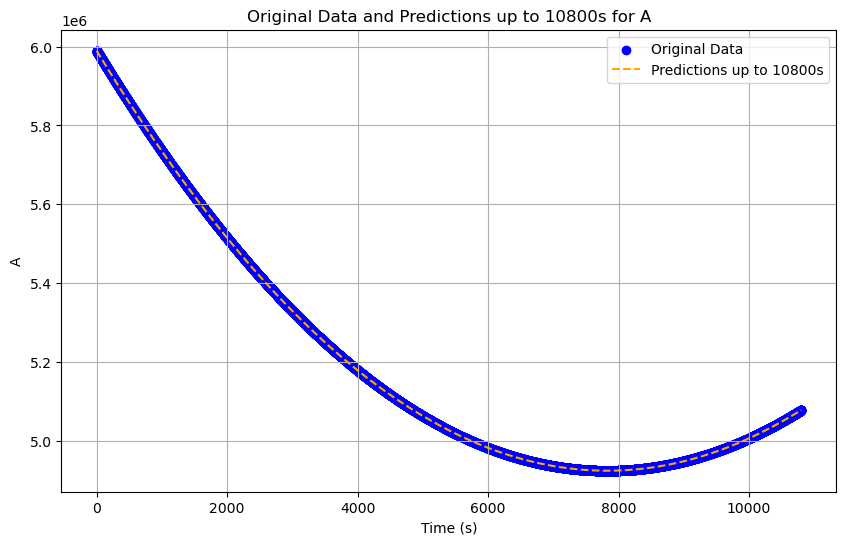

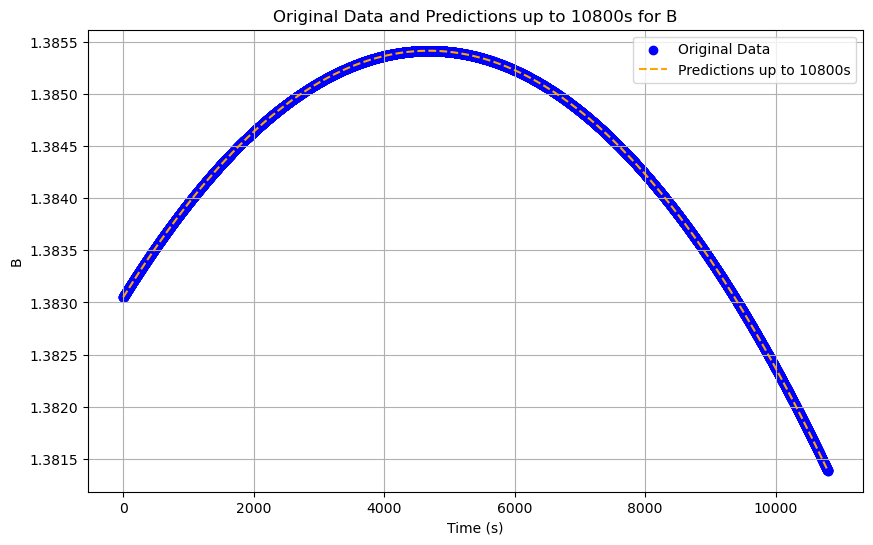

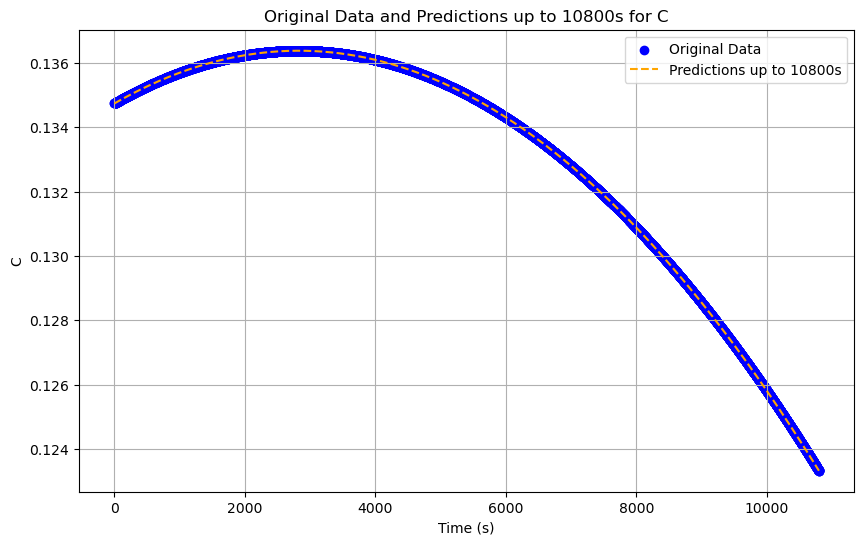

In [9]:
# Train the models on the entire dataset up to 10800s
features_full = pd.DataFrame({'Time (s)': range(10801)})  # Assuming Time starts from 0
predictions_full = pd.DataFrame()

for target_column, (model, poly) in models.items():
    features_full_poly = poly.transform(features_full)
    predictions_full[target_column] = model.predict(features_full_poly)

# Add the predictions back to the original DataFrame
df_full = pd.concat([features_full, predictions_full], axis=1)

# Plot original data and predictions on the test set
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    plt.plot(features_test['Time (s)'], predictions[target_column], label='Predictions on Test Set', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot original data and predictions up to 10800s
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_full['Time (s)'], df_full[target_column], label='Original Data', color='blue')
    plt.plot(features_full['Time (s)'], predictions_full[target_column], label='Predictions up to 10800s', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions up to 10800s for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


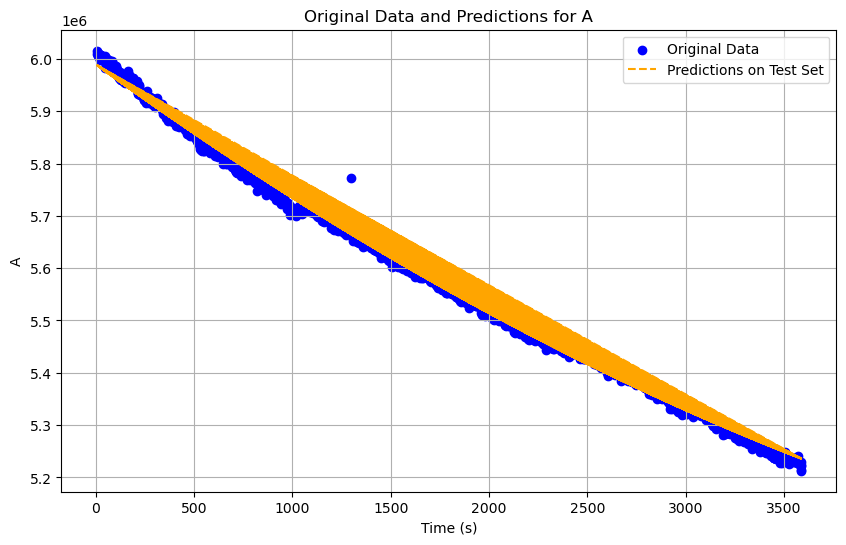

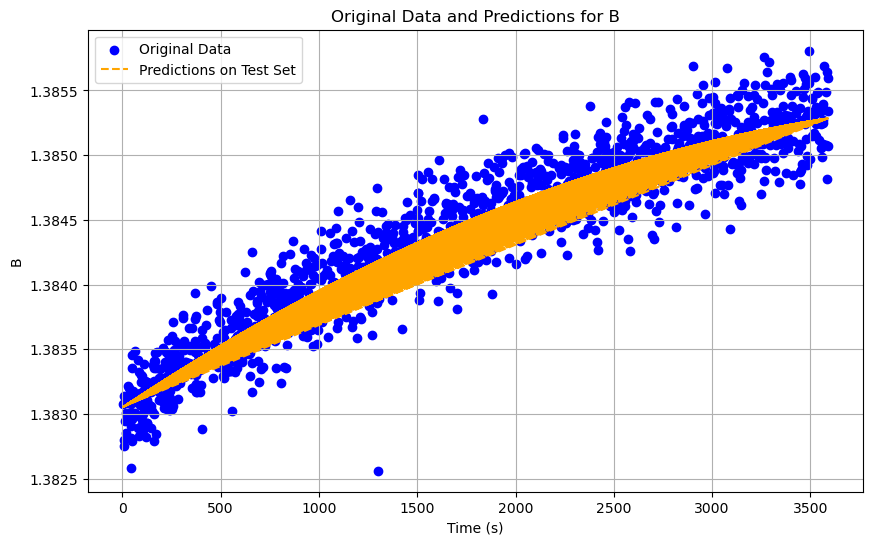

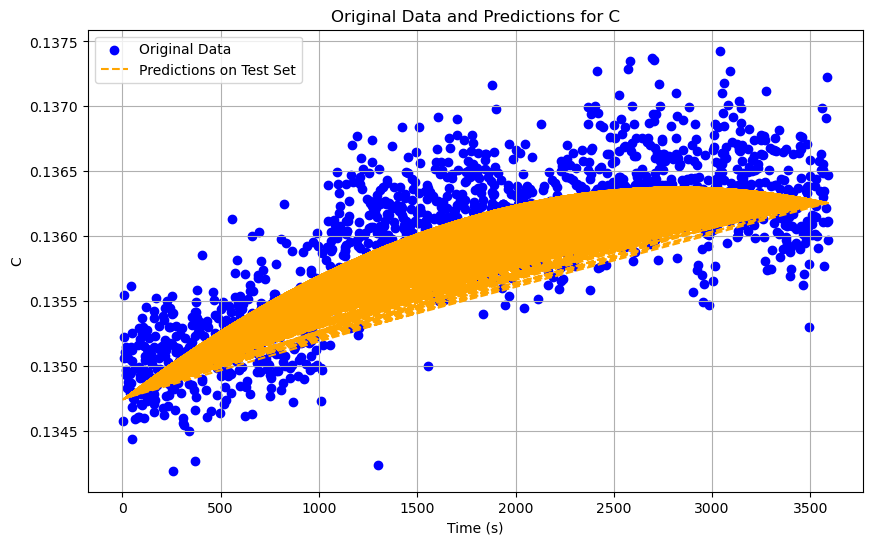

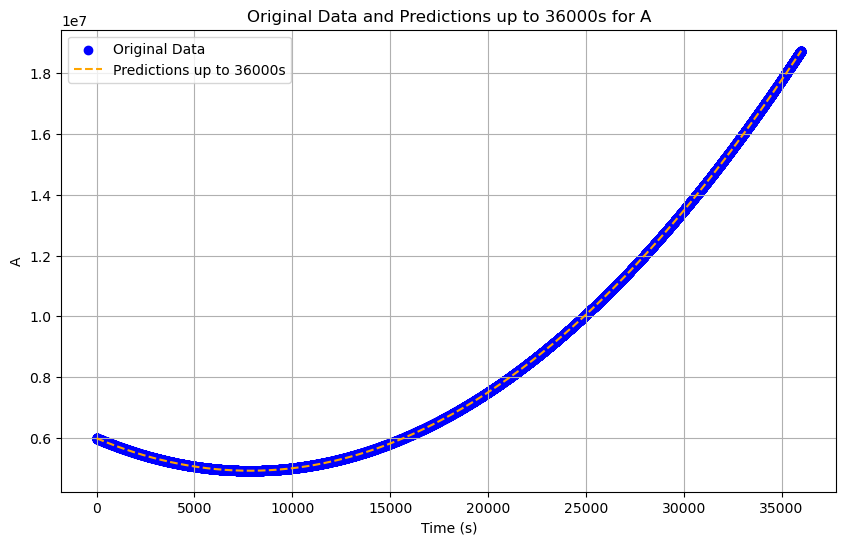

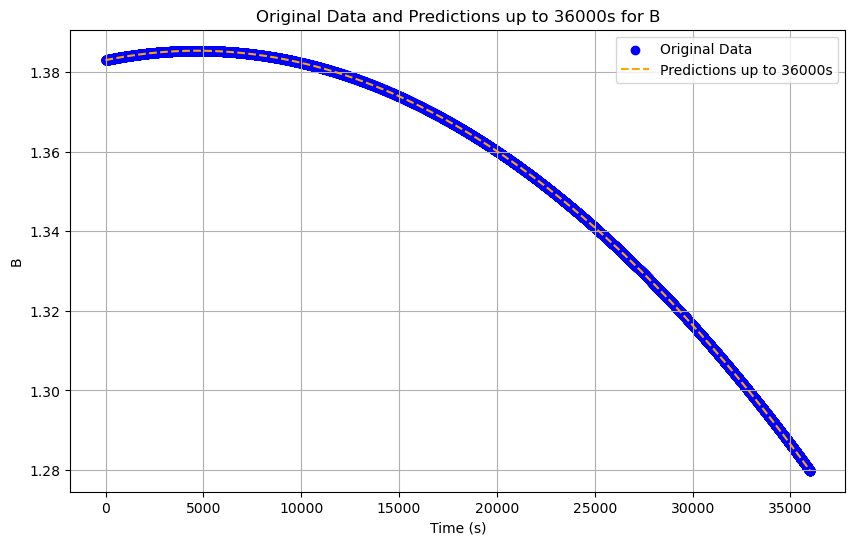

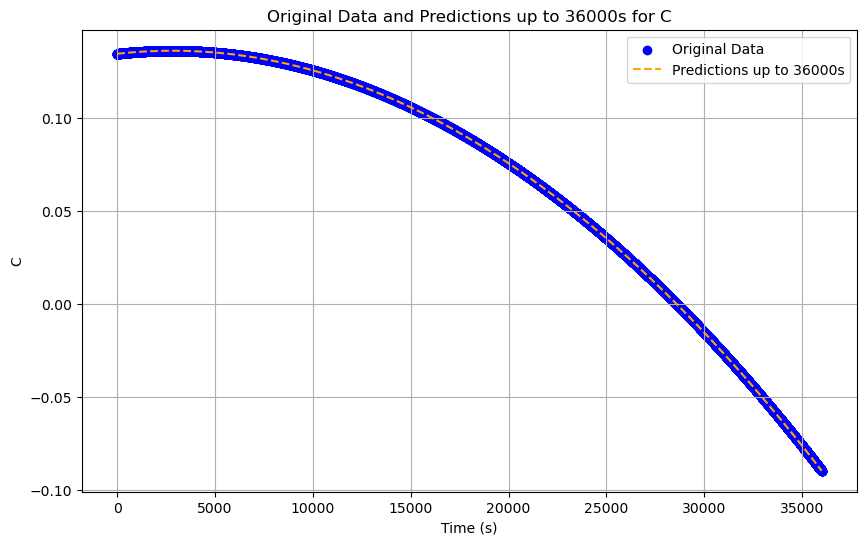

In [86]:
# Train the models on the entire dataset up to 36000s
features_full = pd.DataFrame({'Time (s)': range(36001)})  # Assuming Time starts from 0
predictions_full = pd.DataFrame()

for target_column, (model, poly) in models.items():
    features_full_poly = poly.transform(features_full)
    predictions_full[target_column] = model.predict(features_full_poly)

# Add the predictions back to the original DataFrame
df_full = pd.concat([features_full, predictions_full], axis=1)

# Plot original data and predictions on the test set
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    plt.plot(features_test['Time (s)'], predictions[target_column], label='Predictions on Test Set', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot original data and predictions up to 10800s
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_full['Time (s)'], df_full[target_column], label='Original Data', color='blue')
    plt.plot(features_full['Time (s)'], predictions_full[target_column], label='Predictions up to 36000s', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions up to 36000s for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


## ARIMA

D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init

Mean Squared Error:
15987477049.343328


D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


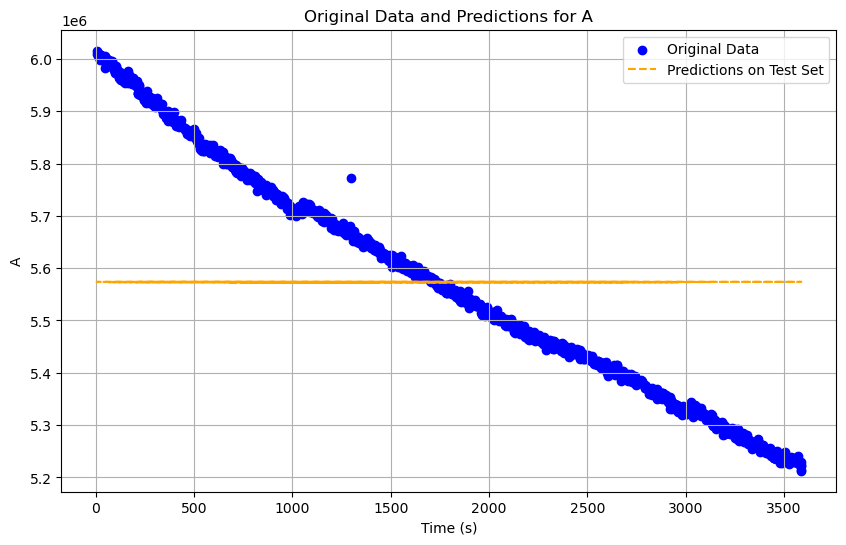

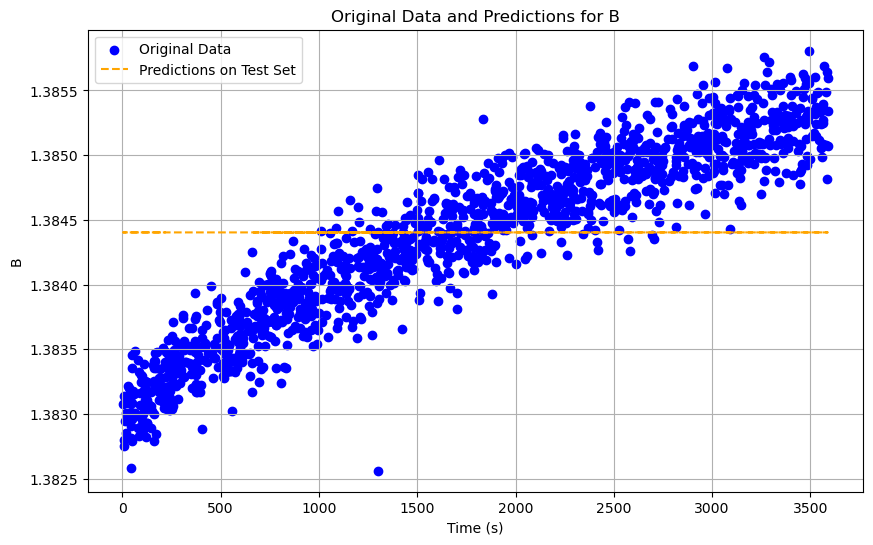

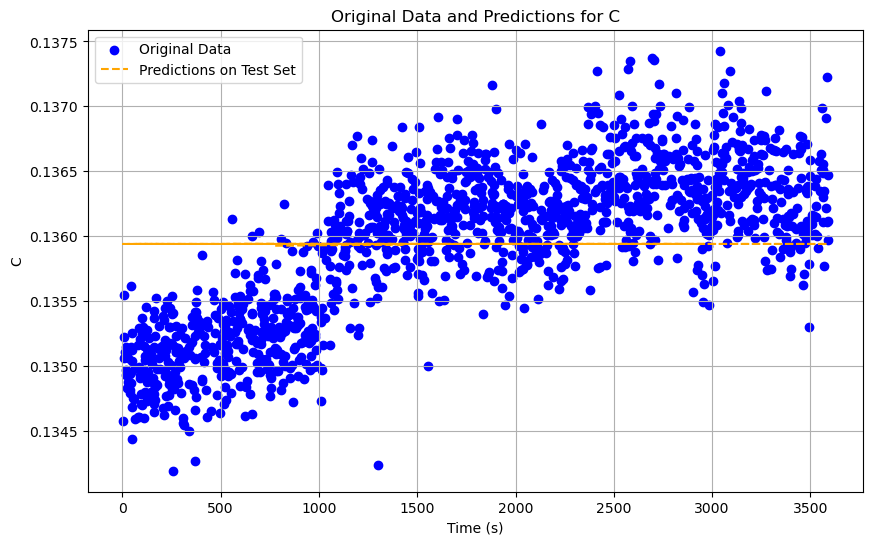

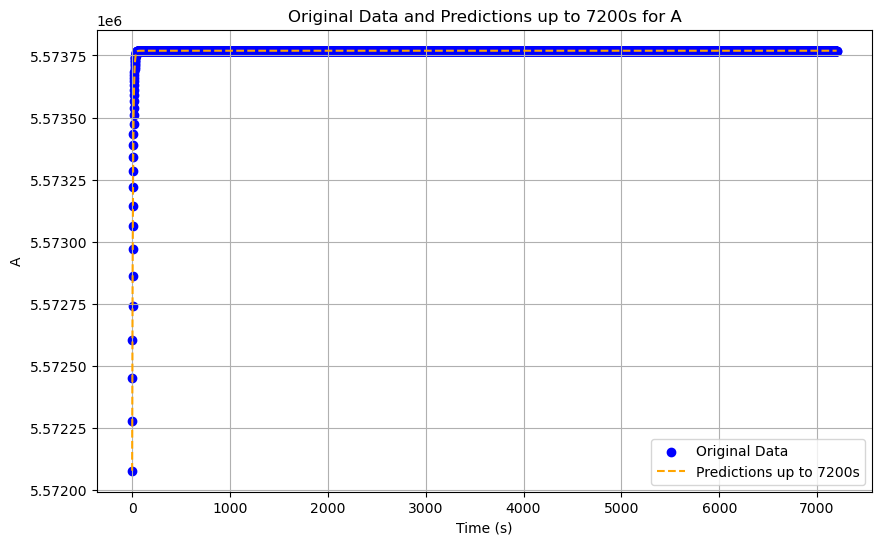

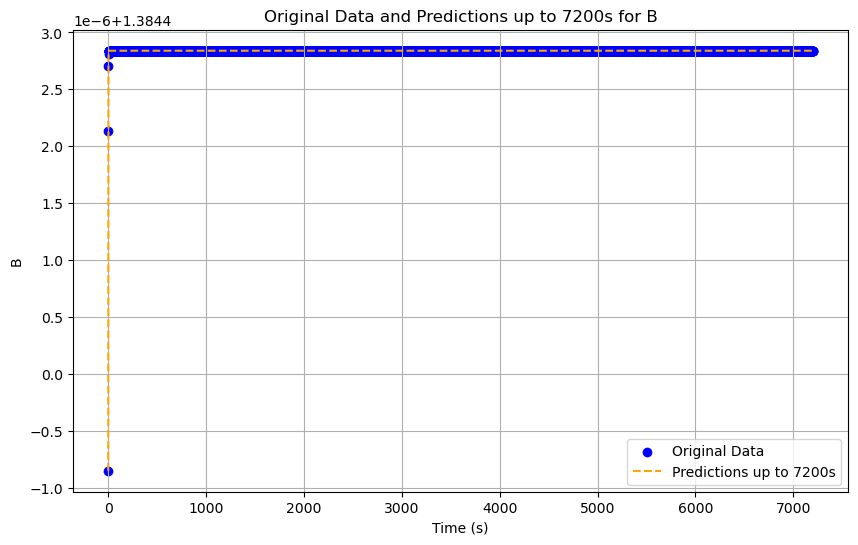

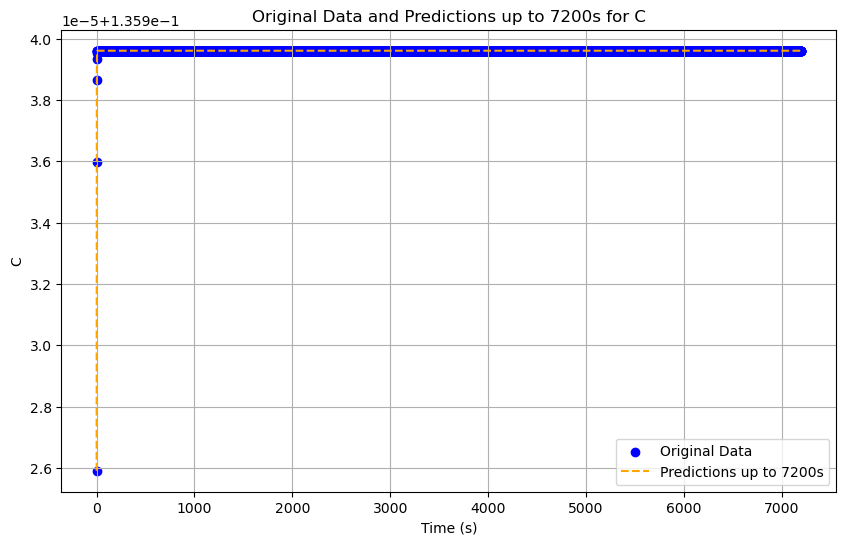

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Feature columns (excluding 'Time (s)')
features = df[['Time (s)']]

# Target columns (A, B, C)
targets = df[['A', 'B', 'C']]

# Split the data into training and testing sets (80% for training, 20% for testing)
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Train an ARIMA model for each coefficient
models = {}

for target_column in targets.columns:
    # Train ARIMA model
    model = ARIMA(targets_train[target_column], order=(1, 0, 1))  # Adjust order as needed
    results = model.fit()
    models[target_column] = results

# Evaluate the models on the test set
predictions = pd.DataFrame()

for target_column, result in models.items():
    forecast = result.forecast(steps=len(features_test))
    predictions[target_column] = forecast.values  # Extract values from the forecast result

# Calculate mean squared error for each target
mse = mean_squared_error(targets_test, predictions)
print(f'Mean Squared Error:\n{mse}')

# Train the models on the entire dataset up to 7200s
features_full = pd.DataFrame({'Time (s)': range(7201)})  # Assuming Time starts from 0
predictions_full = pd.DataFrame()

for target_column, result in models.items():
    forecast_full = result.forecast(steps=len(features_full))
    predictions_full[target_column] = forecast_full.values  # Extract values from the forecast result

# Add the predictions back to the original DataFrame
df_full = pd.concat([features_full, predictions_full], axis=1)

# Plot original data and predictions on the test set
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    plt.plot(features_test['Time (s)'], predictions[target_column], label='Predictions on Test Set', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot original data and predictions up to 7200s
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_full['Time (s)'], df_full[target_column], label='Original Data', color='blue')
    plt.plot(features_full['Time (s)'], predictions_full[target_column], label='Predictions up to 7200s', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original Data and Predictions up to 7200s for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()



## Seasonal Decomposition of Time Series (STL)

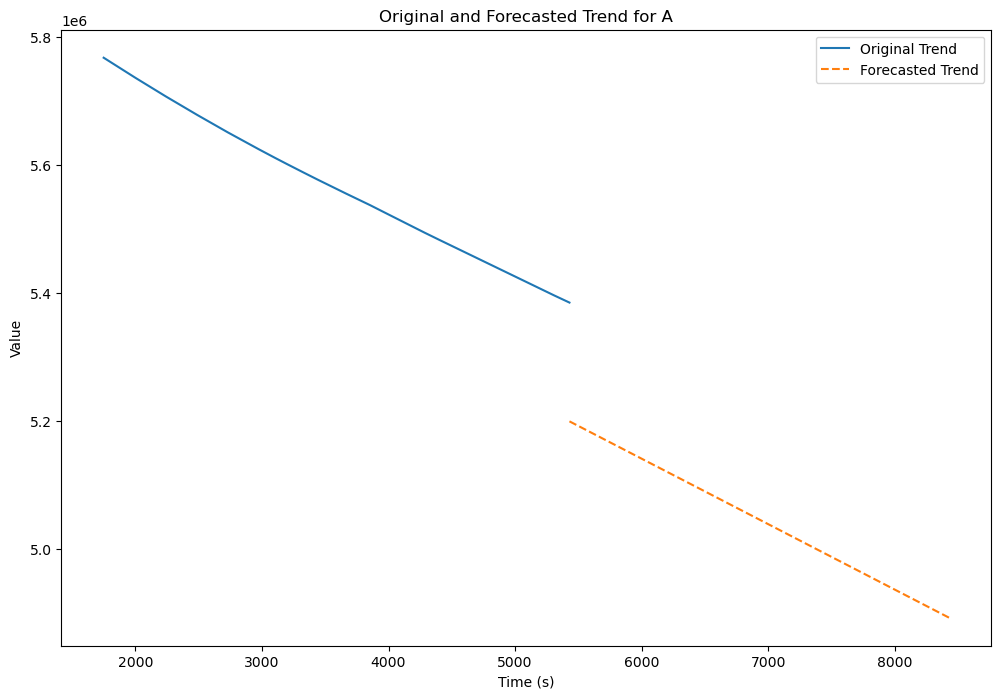

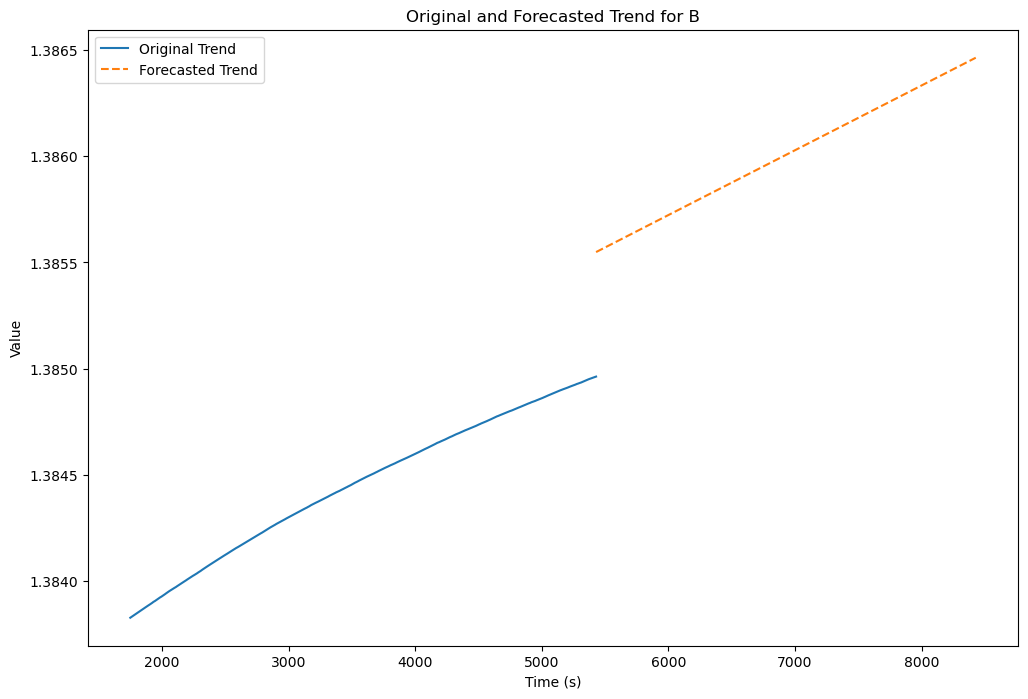

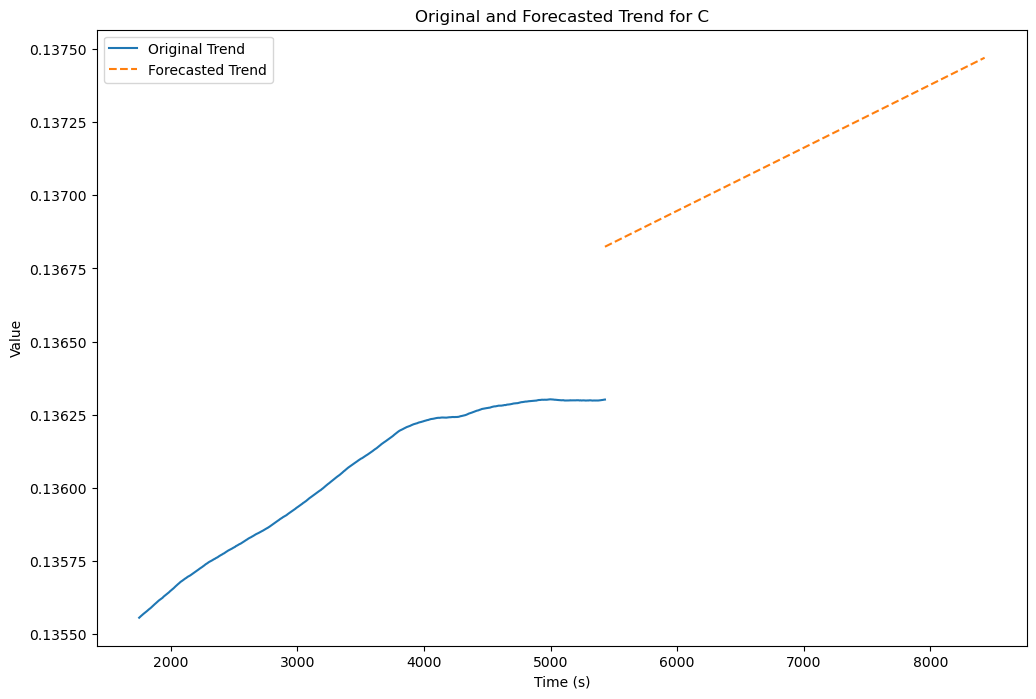

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame
df = results_df 

# Feature columns (excluding 'Time (s)')
features = df[['Time (s)']]

# Target columns (A, B, C)
targets = df[['A', 'B', 'C']]

your_seasonal_period = 3500
your_forecast_horizon = 3000
# Decompose the time series into trend, seasonal, and residual components
for target_column in targets.columns:
    result = seasonal_decompose(targets[target_column], model='additive', period=your_seasonal_period)

    # Extract trend, seasonal, and residual components
    trend = result.trend.dropna()
    seasonal = result.seasonal.dropna()
    residual = result.resid.dropna()

    # Combine components to obtain the original time series
    reconstructed_series = trend + seasonal + residual

    # Forecasting using the trend component (example: linear regression)
    X = np.array(trend.index - trend.index[0]).reshape(-1, 1)  # Use time as the predictor
    y = trend.values.reshape(-1, 1)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future values (adjust as needed)
    future_time = np.arange(trend.index[-1], trend.index[-1] + your_forecast_horizon, 1).reshape(-1, 1)
    future_trend = model.predict(future_time)

    # Additional: Plotting original and forecasted values
    plt.figure(figsize=(12, 8))
    plt.plot(trend.index, trend, label='Original Trend')
    plt.plot(future_time, future_trend, label='Forecasted Trend', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.title(f'Original and Forecasted Trend for {target_column}')
    plt.legend()
    plt.show()


## Prophet

In [8]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame
df = results_df 

# Feature columns (excluding 'Time (s)')
features = df[['Time (s)']]

# Target columns (A, B, C)
targets = df[['A', 'B', 'C']]

# Prepare a DataFrame in the required format for Prophet
prophet_df = targets.rename(columns={'Time (s)': 'ds', 'A': 'y'})

# Initialize and fit the Prophet model for each target_column
for target_column in targets.columns:
    # Select the target column
    prophet_df['y'] = targets[target_column]

    # Initialize the Prophet model
    model = Prophet()

    # Fit the model
    model.fit(prophet_df)

    # Create a DataFrame for future dates (adjust as needed)
    future = model.make_future_dataframe(periods=your_forecast_horizon, freq='s')

    # Make predictions
    forecast = model.predict(future)

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f'Prophet Forecast for {target_column}')
    plt.show()


ModuleNotFoundError: No module named 'fbprophet'

## ExponentialSmoothing

D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return g

Mean Squared Error for A: 58835079267.619865
Mean Squared Error for B: 5.726996523291675e-07
Mean Squared Error for C: 4.3406042090713766e-07


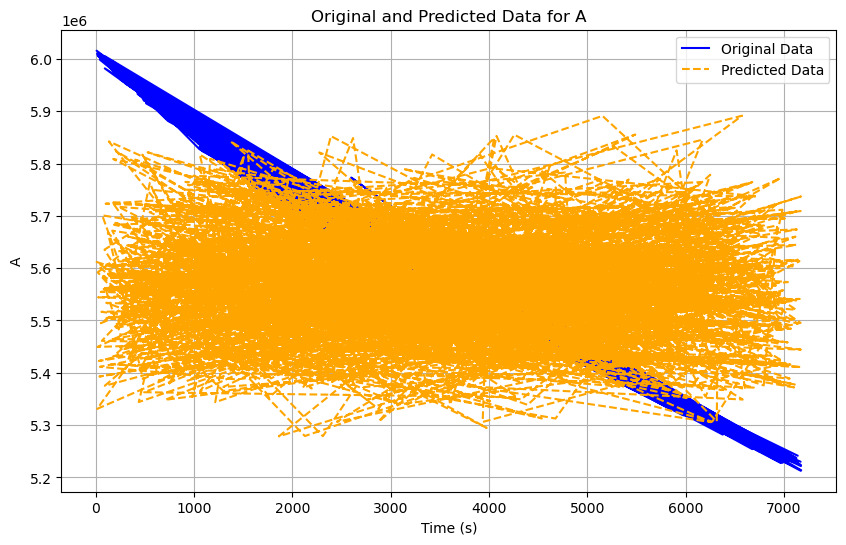

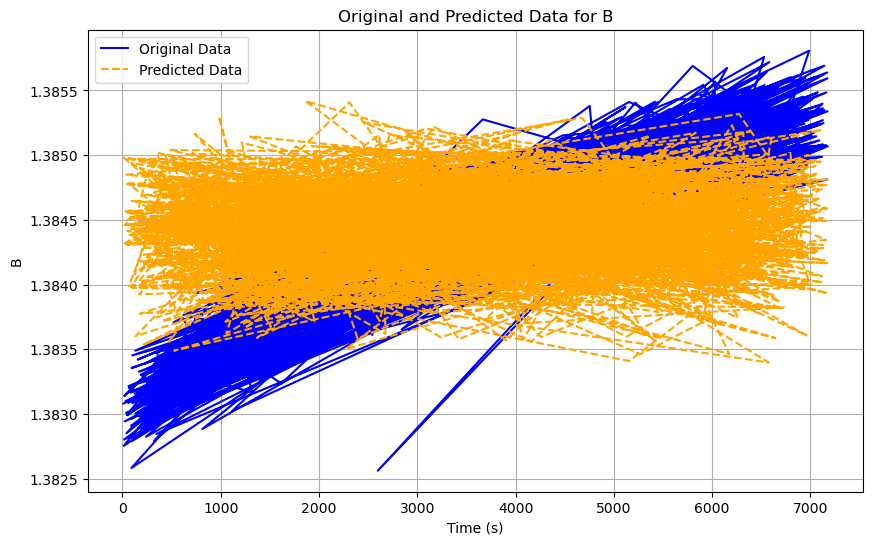

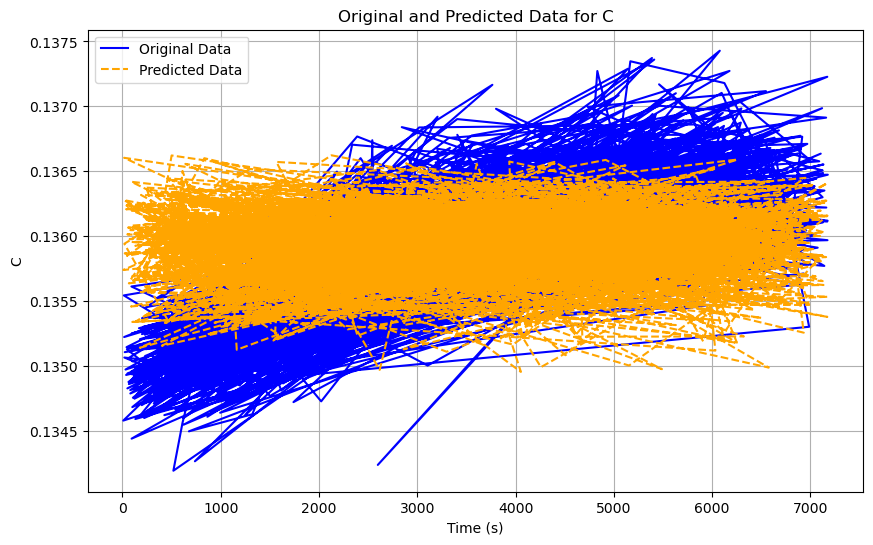

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Feature columns (excluding 'Time (s)')
features = df[['Time (s)']]

# Target columns (A, B, C)
targets = df[['A', 'B', 'C']]

# Split the data into training and testing sets (80% for training, 20% for testing)
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

adjusted_seasonal_period = 1000

# Initialize and fit the ETS model for each target_column
models = {}

for target_column in targets.columns:
    # Initialize the ETS model with adjusted seasonal periods
    model = ExponentialSmoothing(targets_train[target_column], trend="add", seasonal="add", seasonal_periods=adjusted_seasonal_period)

    # Fit the model
    model_fit = model.fit()

    # Save the model
    models[target_column] = model_fit

# Evaluate the models on the test set
predictions = pd.DataFrame()

for target_column, model_fit in models.items():
    # Make predictions
    forecast = model_fit.forecast(len(features_test))

    # Save the predictions
    predictions[target_column] = forecast.values

    # Calculate mean squared error for each target
    mse = mean_squared_error(targets_test[target_column], forecast)
    print(f'Mean Squared Error for {target_column}: {mse}')

# Additional: Plotting original and predicted values
for target_column in targets.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(targets_test.index, targets_test[target_column], label='Original Data', color='blue')
    plt.plot(targets_test.index, predictions[target_column], label='Predicted Data', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Predicted Data for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


## Long Short-Term Memory (LSTM)

Epoch 1/50
180/180 [==============================] - 5s 8ms/step - loss: 0.0919
Epoch 2/50
180/180 [==============================] - 1s 8ms/step - loss: 0.0851
Epoch 3/50
180/180 [==============================] - 1s 8ms/step - loss: 0.0846
Epoch 4/50
180/180 [==============================] - 2s 8ms/step - loss: 0.0845
Epoch 5/50
180/180 [==============================] - 2s 8ms/step - loss: 0.0841
Epoch 6/50
180/180 [==============================] - 2s 9ms/step - loss: 0.0842
Epoch 7/50
180/180 [==============================] - 2s 9ms/step - loss: 0.0840
Epoch 8/50
180/180 [==============================] - 2s 9ms/step - loss: 0.0838
Epoch 9/50
180/180 [==============================] - 1s 8ms/step - loss: 0.0841
Epoch 10/50
180/180 [==============================] - 1s 7ms/step - loss: 0.0839
Epoch 11/50
180/180 [==============================] - 1s 7ms/step - loss: 0.0838
Epoch 12/50
180/180 [==============================] - 1s 7ms/step - loss: 0.0838
Epoch 13/50
180/180 [====

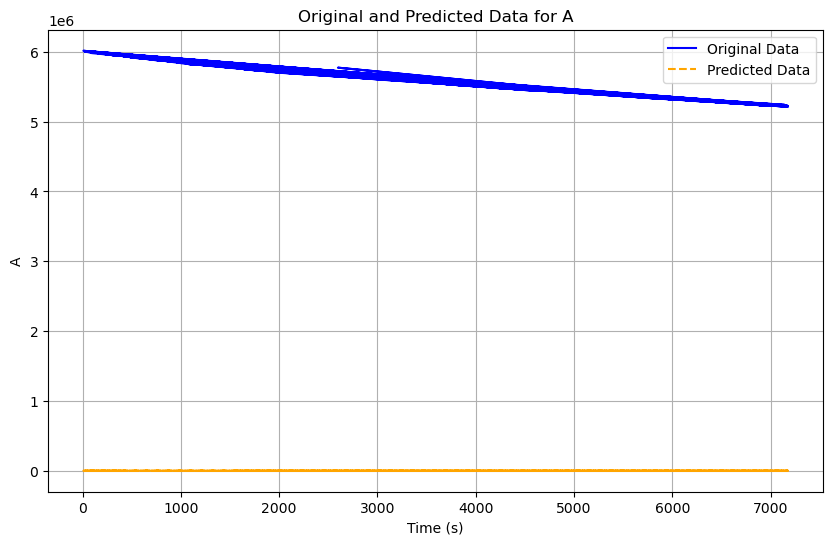

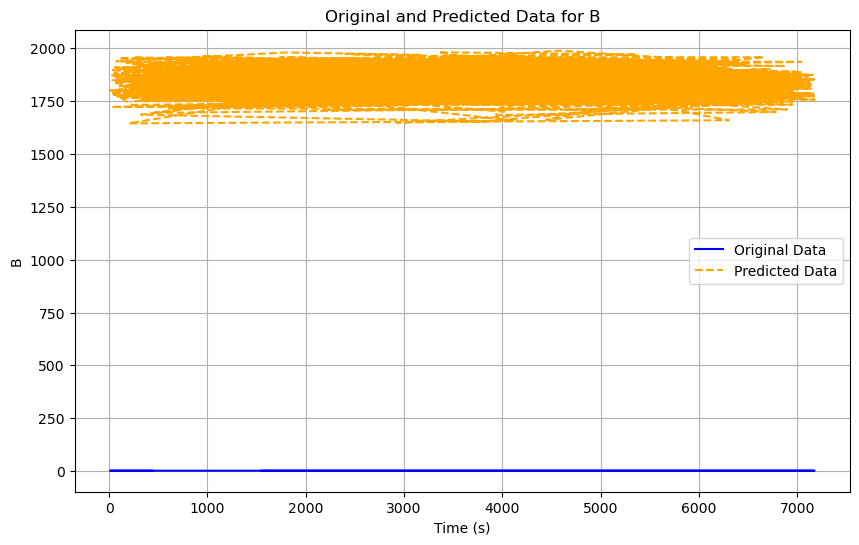

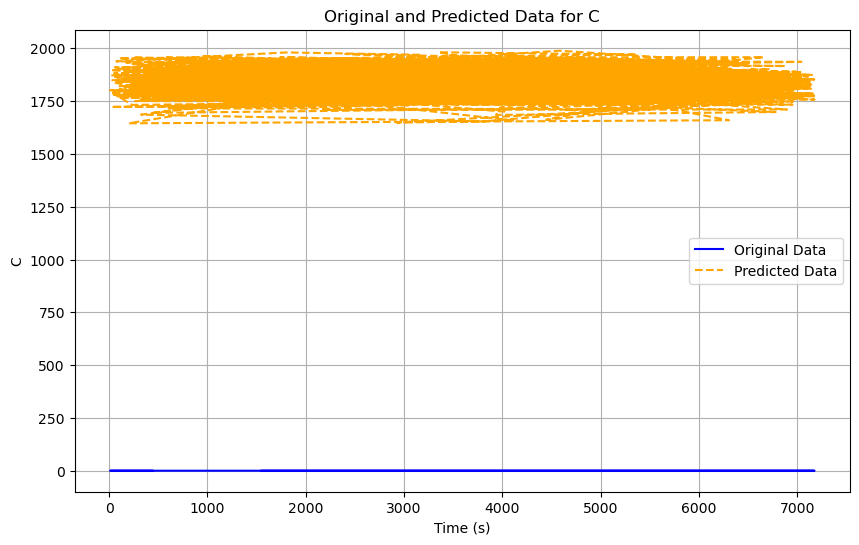

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Feature columns (excluding 'Time (s)')
features = df[['Time (s)']]

# Target columns (A, B, C)
targets = df[['A', 'B', 'C']]

# Split the data into training and testing sets (80% for training, 20% for testing)
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Scale the data to the range [0, 1] using Min-Max scaling
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# Define a function to prepare the data for LSTM
def prepare_lstm_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set the number of time steps for the LSTM
time_steps = 10  # Adjust as needed

# Prepare the training data for LSTM
X_train, y_train = prepare_lstm_data(features_train_scaled, time_steps)

# Reshape the data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Prepare the testing data for LSTM
X_test, y_test = prepare_lstm_data(features_test_scaled, time_steps)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions using the LSTM model
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled)

# Plot the original and predicted values
for i, target_column in enumerate(targets.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(targets_test.index[time_steps:], targets_test[target_column][time_steps:], label='Original Data', color='blue')
    plt.plot(targets_test.index[time_steps:], predictions[:, 0], label='Predicted Data', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Predicted Data for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

## Gated Recurrent Unit (GRU) Networks

Epoch 1/50
180/180 [==============================] - 2s 5ms/step - loss: 0.0729 - val_loss: 0.0402
Epoch 2/50
180/180 [==============================] - 1s 4ms/step - loss: 0.0386 - val_loss: 0.0389
Epoch 3/50
180/180 [==============================] - 1s 4ms/step - loss: 0.0384 - val_loss: 0.0391
Epoch 4/50
180/180 [==============================] - 1s 4ms/step - loss: 0.0383 - val_loss: 0.0389
Epoch 5/50
180/180 [==============================] - 1s 3ms/step - loss: 0.0384 - val_loss: 0.0389
Epoch 6/50
180/180 [==============================] - 1s 4ms/step - loss: 0.0384 - val_loss: 0.0390
Epoch 7/50
180/180 [==============================] - 1s 3ms/step - loss: 0.0383 - val_loss: 0.0389
Epoch 8/50
180/180 [==============================] - 1s 3ms/step - loss: 0.0383 - val_loss: 0.0393
Epoch 9/50
180/180 [==============================] - 1s 4ms/step - loss: 0.0383 - val_loss: 0.0390
Epoch 10/50
180/180 [==============================] - 1s 3ms/step - loss: 0.0384 - val_loss: 0.0389

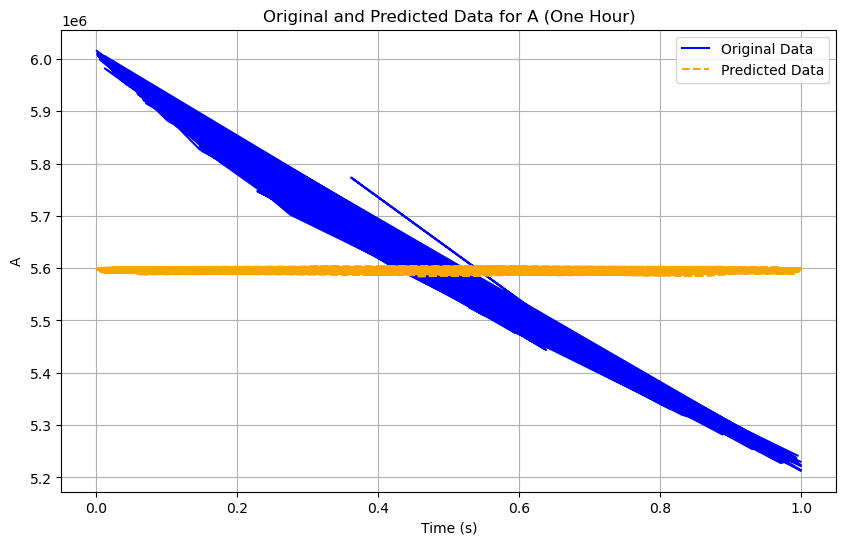

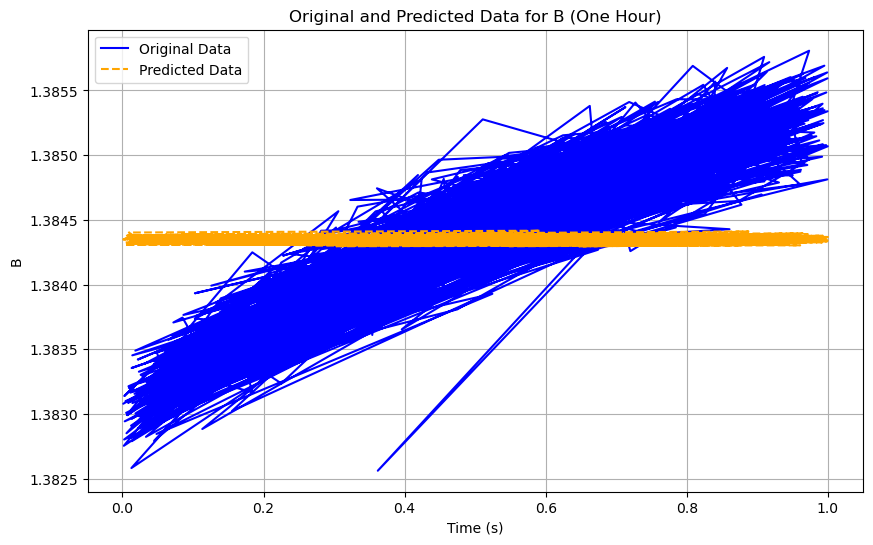

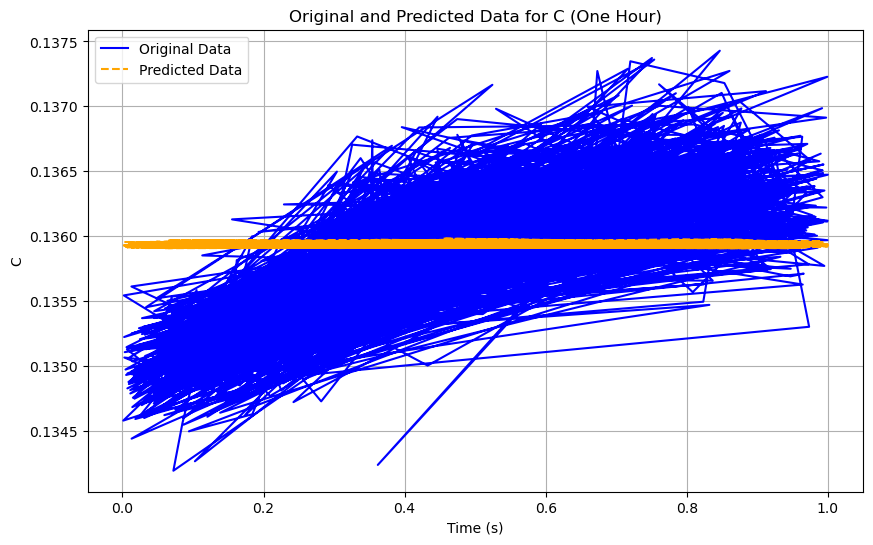

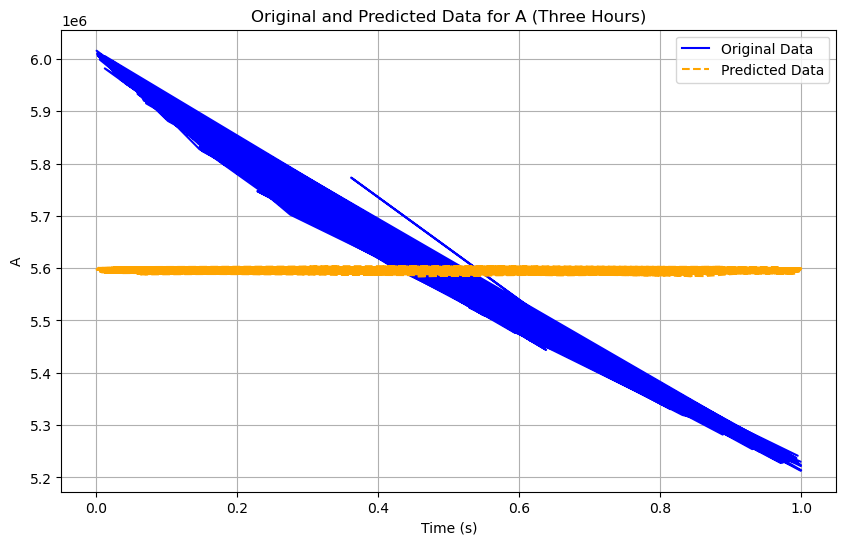

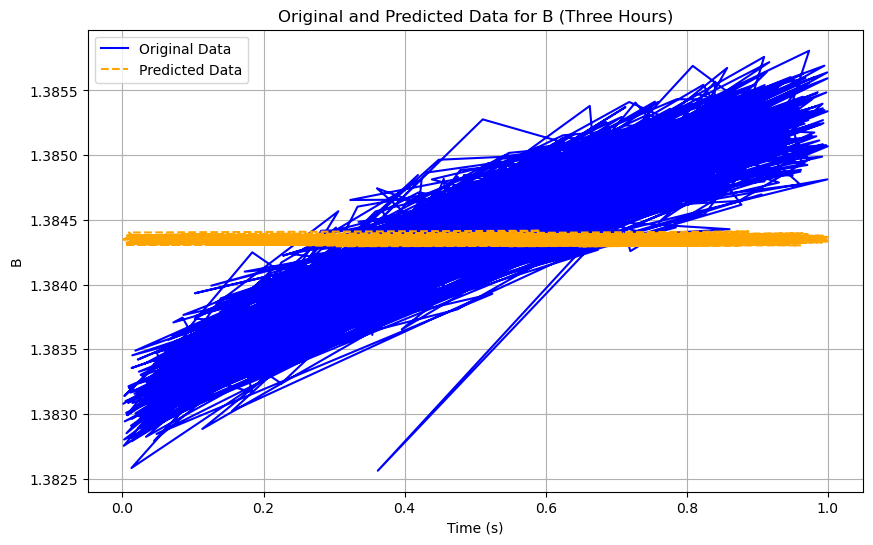

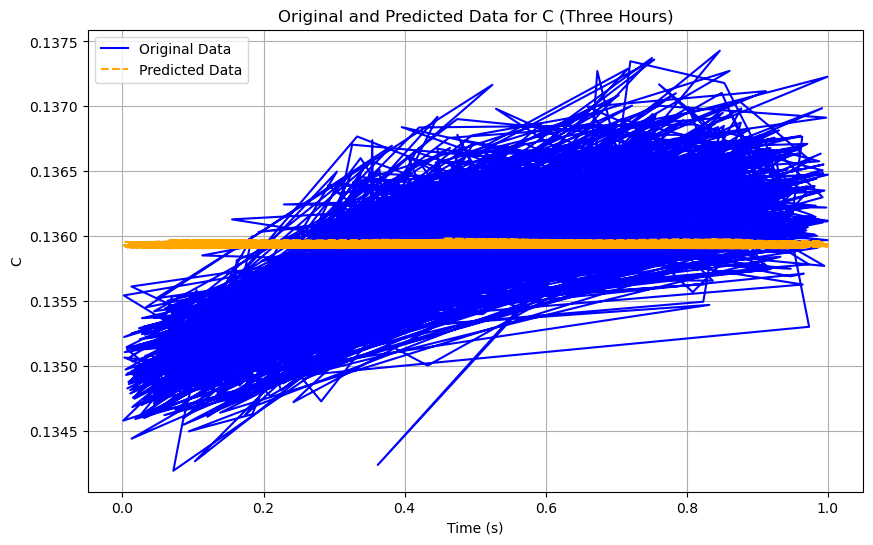

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Extract features and targets
features = df[['Time (s)']]
targets = df[['A', 'B', 'C']]

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
targets_scaled = scaler.fit_transform(targets)

# Split the data into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features_scaled, targets_scaled, test_size=0.2, random_state=42
)

# Define the reshaping function
def reshape_for_gru(features, targets, time_steps=1):
    X, y = [], []
    for i in range(len(features) - time_steps):
        seq_x = features[i:i + time_steps]
        seq_y = targets[i + time_steps]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Assuming time_steps = 5 (you can adjust this based on your needs)
time_steps = 5

# Reshape the data for GRU
X_train, y_train = reshape_for_gru(features_train, targets_train, time_steps)
X_test, y_test = reshape_for_gru(features_test, targets_test, time_steps)

# Build the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(3))  # Output layer with 3 neurons for A, B, and C
model.compile(optimizer=Adam(), loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
predictions = model.predict(X_test)

# Invert the scaling for plotting
predictions_inverted = scaler.inverse_transform(predictions)
targets_inverted = scaler.inverse_transform(y_test)

# Plot the results for one hour
for i, target_column in enumerate(targets.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(features_test[time_steps:], targets_inverted[:, i], label='Original Data', color='blue')
    plt.plot(features_test[time_steps:], predictions_inverted[:, i], label='Predicted Data', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Predicted Data for {target_column} (One Hour)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the results for three hours
for i, target_column in enumerate(targets.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(features_test[time_steps:], targets_inverted[:, i], label='Original Data', color='blue')
    plt.plot(features_test[time_steps:], predictions_inverted[:, i], label='Predicted Data', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Predicted Data for {target_column} (Three Hours)')
    plt.legend()
    plt.grid(True)
    plt.show()


## XGBoost and LightGBM

D:\Users\ivan\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Users\ivan\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 227, in _count_physical_cores
    cpu_info = subprocess.run(
  File "D:\Users\ivan\anaconda3\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "D:\Users\ivan\anaconda3\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Users\ivan\anaconda3\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5744, number of used features: 1
[LightGBM] [Info] Start training from score 0.428401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5744, number of used features: 1
[LightGBM] [Info] Start training from score 0.681165
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 5744,

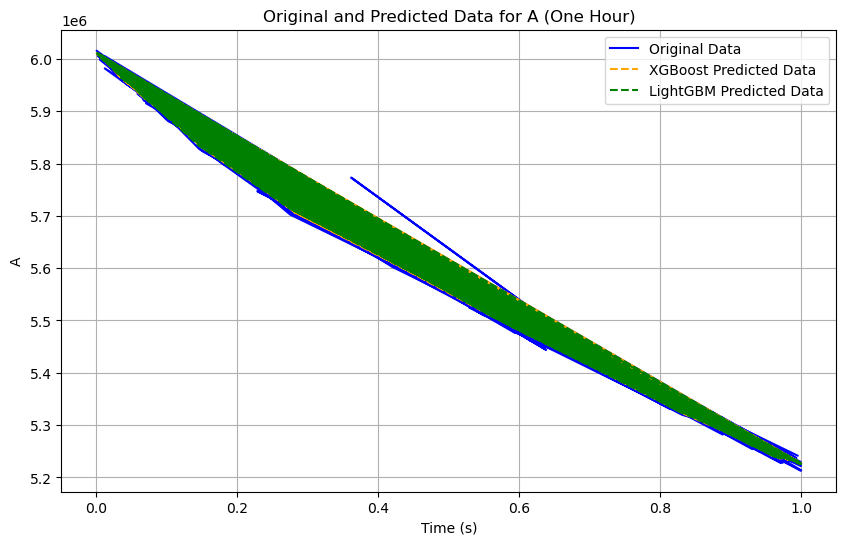

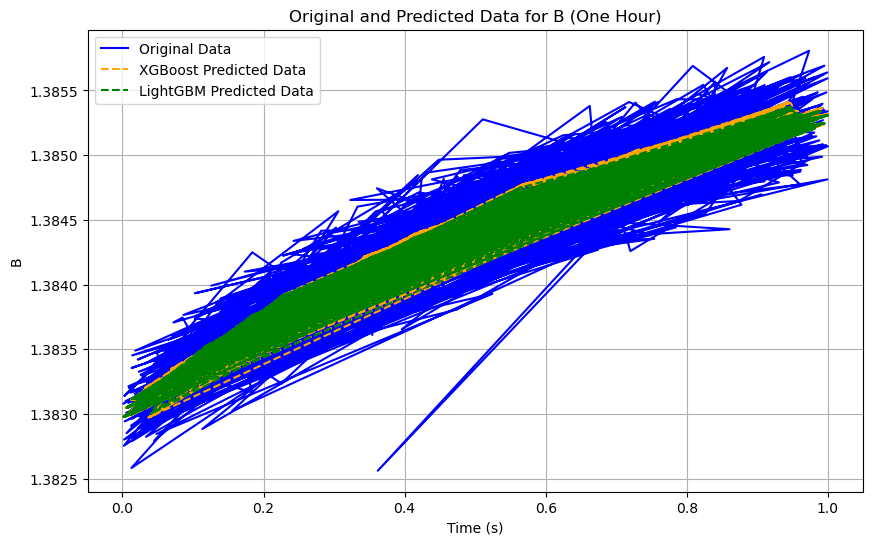

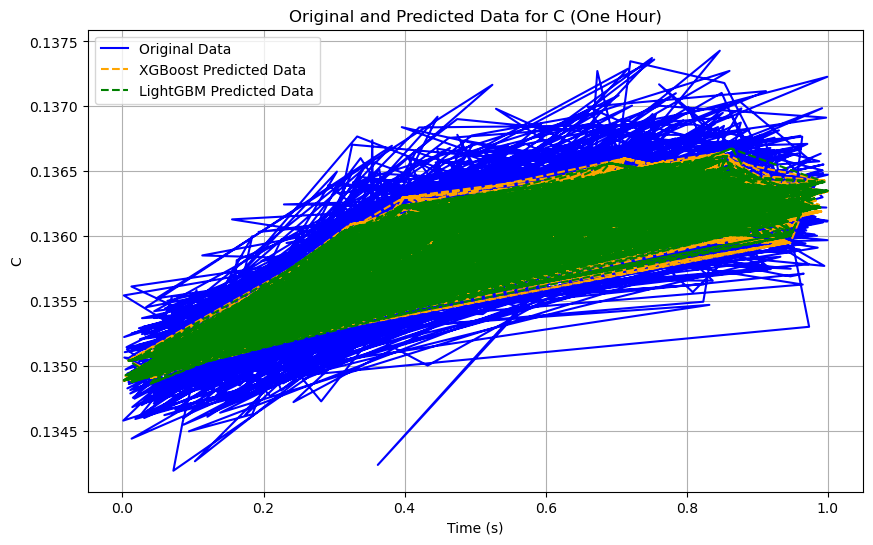

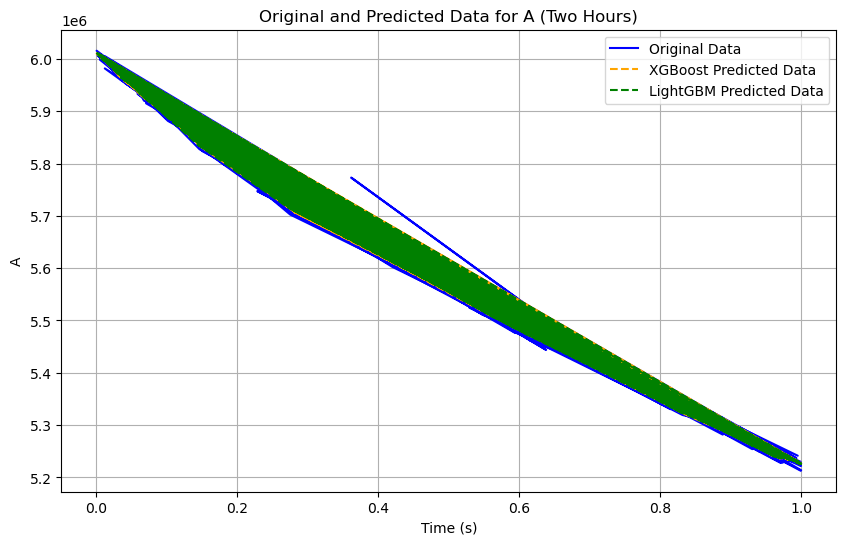

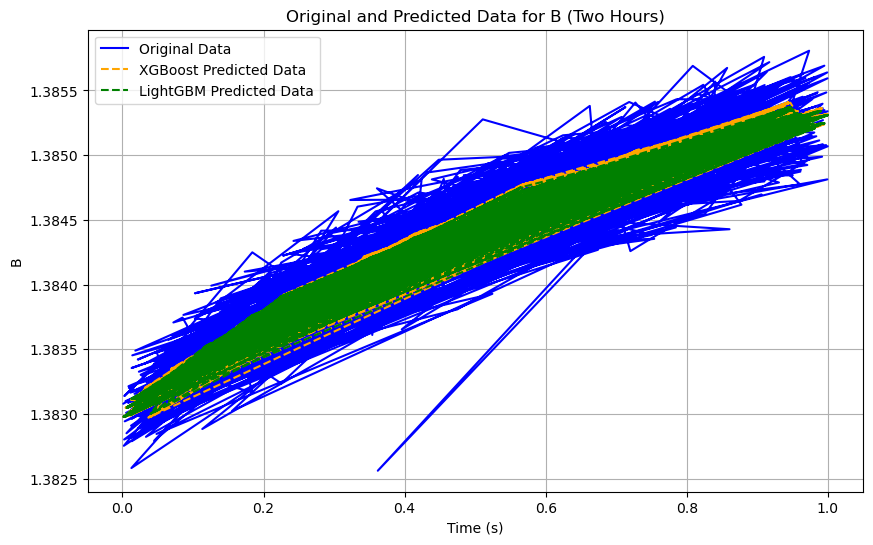

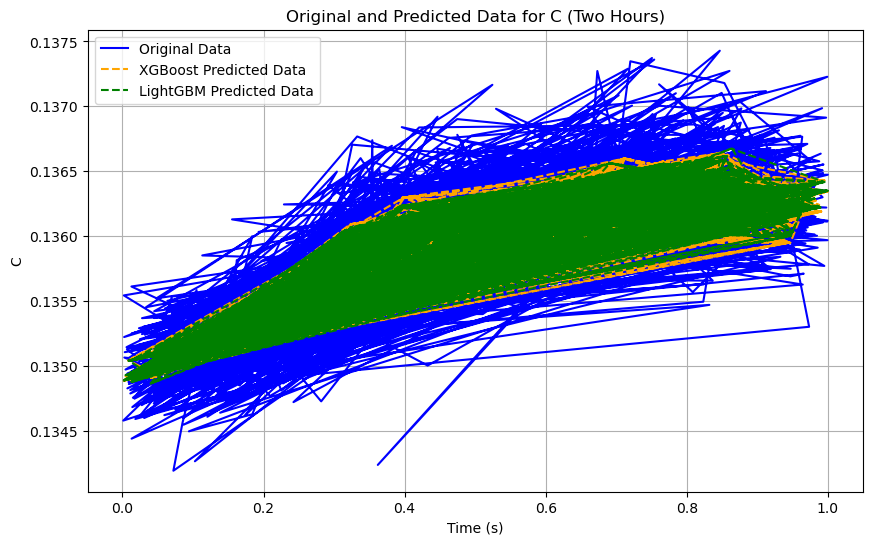

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Extract features and targets
features = df[['Time (s)']]
targets = df[['A', 'B', 'C']]

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
targets_scaled = scaler.fit_transform(targets)

# Split the data into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features_scaled, targets_scaled, test_size=0.2, random_state=42
)

# Convert targets_train back to DataFrame
targets_train_df = pd.DataFrame(targets_train, columns=targets.columns)

# Train XGBoost models
xgb_models = {}
for target_column in targets.columns:
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(features_train, targets_train_df[target_column])
    xgb_models[target_column] = model

# Train LightGBM models
lgbm_models = {}
for target_column in targets.columns:
    model = LGBMRegressor()
    model.fit(features_train, targets_train_df[target_column])
    lgbm_models[target_column] = model

# Make predictions on the test set
xgb_predictions = pd.DataFrame()
lgbm_predictions = pd.DataFrame()

for target_column, model in xgb_models.items():
    xgb_predictions[target_column] = model.predict(features_test)

for target_column, model in lgbm_models.items():
    lgbm_predictions[target_column] = model.predict(features_test)

# Invert the scaling for plotting
xgb_predictions_inverted = scaler.inverse_transform(xgb_predictions)
lgbm_predictions_inverted = scaler.inverse_transform(lgbm_predictions)
targets_inverted = scaler.inverse_transform(targets_test)

# Plot the results for one hour
for i, target_column in enumerate(targets.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(features_test, targets_inverted[:, i], label='Original Data', color='blue')
    plt.plot(features_test, xgb_predictions_inverted[:, i], label='XGBoost Predicted Data', linestyle='--', color='orange')
    plt.plot(features_test, lgbm_predictions_inverted[:, i], label='LightGBM Predicted Data', linestyle='--', color='green')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Predicted Data for {target_column} (One Hour)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the results for two hours
for i, target_column in enumerate(targets.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(features_test, targets_inverted[:, i], label='Original Data', color='blue')
    plt.plot(features_test, xgb_predictions_inverted[:, i], label='XGBoost Predicted Data', linestyle='--', color='orange')
    plt.plot(features_test, lgbm_predictions_inverted[:, i], label='LightGBM Predicted Data', linestyle='--', color='green')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Predicted Data for {target_column} (Two Hours)')
    plt.legend()
    plt.grid(True)
    plt.show()



## Facebook's Kats (Kats Time Series Analysis Toolkit

In [23]:
from kats.consts import TimeSeriesData
from kats.models import (
    prophet,
    linear_model,
    quadratic_model,
    arima,
    holtwinters,
)
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
# If it's not, replace 'df' with the actual name of your DataFrame

# Extract features and targets
features = df[['Time (s)']]
targets = df[['A', 'B', 'C']]

# Split the data into training and testing sets
features_train, features_test, targets_train, targets_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Convert to TimeSeriesData format
features_ts_train = TimeSeriesData(time = features_train['Time (s)'], value = [0]*len(features_train))
targets_ts_train = TimeSeriesData(time = features_train['Time (s)'], value = targets_train.values.T.tolist())

# Initialize models
prophet_model = prophet.ProphetModel()
linear_model = linear_model.LinearModel()
quadratic_model = quadratic_model.QuadraticModel()
arima_model = arima.ARIMAModel()
holtwinters_model = holtwinters.HoltWintersModel()

# Fit the models
prophet_model.fit(data=targets_ts_train)
linear_model.fit(data=targets_ts_train)
quadratic_model.fit(data=targets_ts_train)
arima_model.fit(data=targets_ts_train)
holtwinters_model.fit(data=targets_ts_train)

# Make predictions
prophet_forecast = prophet_model.predict(steps=len(features_test))
linear_forecast = linear_model.predict(steps=len(features_test))
quadratic_forecast = quadratic_model.predict(steps=len(features_test))
arima_forecast = arima_model.predict(steps=len(features_test))
holtwinters_forecast = holtwinters_model.predict(steps=len(features_test))

# Plot the results for one hour
for i, target_column in enumerate(targets.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    plt.plot(features_test['Time (s)'], prophet_forecast[target_column], label='Prophet Predicted Data', linestyle='--', color='orange')
    plt.plot(features_test['Time (s)'], linear_forecast[target_column], label='Linear Predicted Data', linestyle='--', color='green')
    plt.plot(features_test['Time (s)'], quadratic_forecast[target_column], label='Quadratic Predicted Data', linestyle='--', color='red')
    plt.plot(features_test['Time (s)'], arima_forecast[target_column], label='ARIMA Predicted Data', linestyle='--', color='purple')
    plt.plot(features_test['Time (s)'], holtwinters_forecast[target_column], label='Holt-Winters Predicted Data', linestyle='--', color='brown')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Predicted Data for {target_column} (One Hour)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the results for two hours
for i, target_column in enumerate(targets.columns):
    plt.figure(figsize=(10, 6))
    plt.plot(features_test['Time (s)'], targets_test[target_column], label='Original Data', color='blue')
    plt.plot(features_test['Time (s)'], prophet_forecast[target_column], label='Prophet Predicted Data', linestyle='--', color='orange')
    plt.plot(features_test['Time (s)'], linear_forecast[target_column], label='Linear Predicted Data', linestyle='--', color='green')
    plt.plot(features_test['Time (s)'], quadratic_forecast[target_column], label='Quadratic Predicted Data', linestyle='--', color='red')
    plt.plot(features_test['Time (s)'], arima_forecast[target_column], label='ARIMA Predicted Data', linestyle='--', color='purple')
    plt.plot(features_test['Time (s)'], holtwinters_forecast[target_column], label='Holt-Winters Predicted Data', linestyle='--', color='brown')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Predicted Data for {target_column} (Two Hours)')
    plt.legend()
    plt.grid(True)
    plt.show()


ModuleNotFoundError: No module named 'kats'

## Dynamic Time Warping (DTW)

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from fastdtw import fastdtw
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Time (s)', 'A', 'B', 'C' columns
# Ensure that 'Time (s)' is in seconds and starts from 0

# Function to calculate DTW distance between two sequences
def calculate_dtw_distance(seq1, seq2):
    distance, _ = fastdtw(seq1, seq2, dist=lambda x, y: np.linalg.norm(x - y))
    return distance

# Function to prepare data for regression
def prepare_data_for_regression(df, target_column, window_size=30):
    X, y = [], []

    for i in range(len(df) - window_size):
        window_data = df[target_column][i:i+window_size]
        target_value = df[target_column].iloc[i + window_size]
        X.append(window_data.values)
        y.append(target_value)

    return np.array(X), np.array(y)

# Define the window size for DTW similarity measurement
dtw_window_size = 30

# Iterate over target columns
for target_column in ['A', 'B', 'C']:
    # Prepare data for regression
    X, y = prepare_data_for_regression(df, target_column)

    # Split data into training and testing sets (80% for training, 20% for testing)
    split_idx = int(0.8 * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict using DTW similarity measurement
    dtw_distances = []
    for i in range(len(X_test)):
        dtw_distance = calculate_dtw_distance(X_test[i], X_train)
        dtw_distances.append(dtw_distance)

    # Normalize DTW distances to be between 0 and 1
    normalized_dtw_distances = (dtw_distances - np.min(dtw_distances)) / (np.max(dtw_distances) - np.min(dtw_distances))

    # Combine DTW distances and original features as input for linear regression
    X_combined = np.column_stack((X_test, normalized_dtw_distances))

    # Make predictions
    predictions = model.predict(X_combined)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (s)'][split_idx:], y_test, label='Original Data', color='blue')
    plt.plot(df['Time (s)'][split_idx:], predictions, label='Predicted Data', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Predicted Data for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()



KeyboardInterrupt: 

## Hybrid Models

224/224 [==============================] - 1s 4ms/step


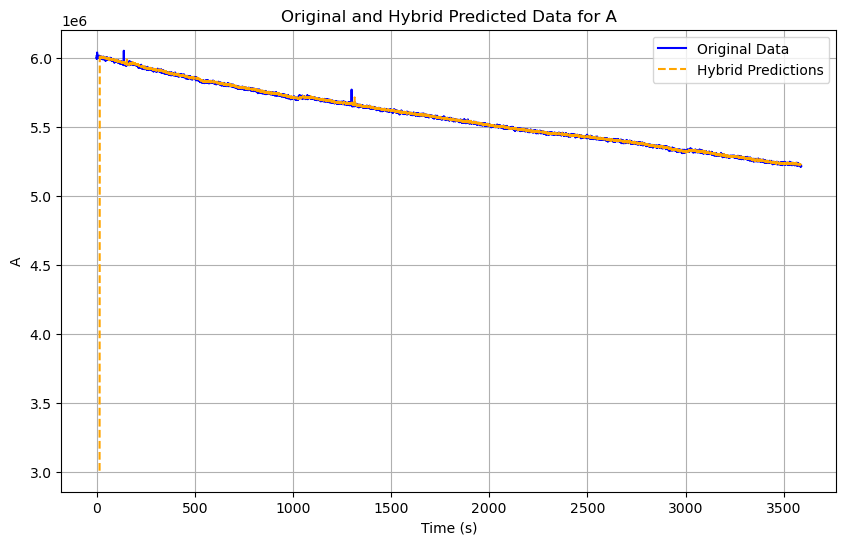

D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


224/224 [==============================] - 1s 3ms/step


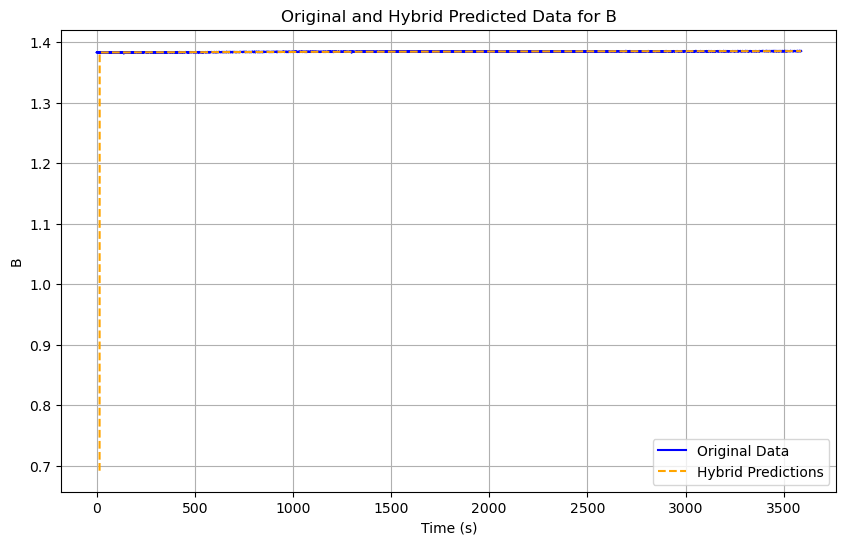

D:\Users\ivan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


224/224 [==============================] - 1s 3ms/step


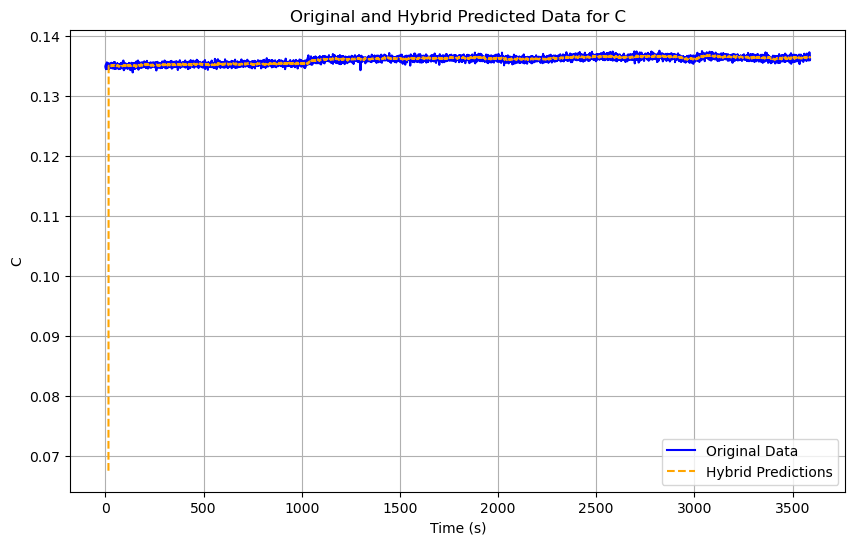

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df is your DataFrame with 'Time (s)', 'A', 'B', 'C' columns
# Ensure that 'Time (s)' is in seconds and starts from 0

# Function to prepare data for LSTM
def prepare_data_for_lstm(df, target_column, window_size=30):
    data = df[target_column].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    X, y = [], []

    for i in range(len(data_scaled) - window_size):
        X.append(data_scaled[i:i + window_size])
        y.append(data_scaled[i + window_size])

    return np.array(X), np.array(y), scaler

# Function to train LSTM model
def train_lstm(X_train, y_train, window_size=30):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, verbose=0)
    return model

# Function to prepare data for ARIMA
def prepare_data_for_arima(df, target_column):
    return df[target_column].values

# Function to train ARIMA model
def train_arima(data):
    model = ARIMA(data, order=(5, 1, 0))
    fit_model = model.fit()
    return fit_model

# Function to make predictions with hybrid model
def hybrid_predict(arima_model, lstm_model, X_arima, X_lstm, scaler):
    # Define the start and end points for ARIMA forecast
    arima_start = len(X_arima)
    arima_end = len(X_arima) + len(X_lstm) - 1
    
    # ARIMA predictions
    arima_predictions = arima_model.get_prediction(start=arima_start, end=arima_end)
    arima_mean = arima_predictions.predicted_mean

    # LSTM predictions
    lstm_predictions = lstm_model.predict(X_lstm)
    lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))

    # Hybrid predictions
    hybrid_predictions = (arima_mean + lstm_predictions.flatten()) / 2
    return hybrid_predictions


# Define window size for LSTM
window_size = 30

# Iterate over target columns
for target_column in ['A', 'B', 'C']:
    # Prepare data for ARIMA
    data_arima = prepare_data_for_arima(df, target_column)

    # Train ARIMA model
    arima_model = train_arima(data_arima)

    # Prepare data for LSTM
    X_lstm, y_lstm, scaler = prepare_data_for_lstm(df, target_column, window_size=window_size)

    # Train LSTM model
    lstm_model = train_lstm(X_lstm, y_lstm, window_size=window_size)

    # Make predictions with the hybrid model
    X_arima = np.arange(len(data_arima), len(data_arima) + len(df) - len(data_arima))
    X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

    hybrid_predictions = hybrid_predict(arima_model, lstm_model, X_arima, X_lstm, scaler)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (s)'], df[target_column], label='Original Data', color='blue')
    plt.plot(df['Time (s)'], hybrid_predictions, label='Hybrid Predictions', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Hybrid Predicted Data for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


## Bayesian Structural Time Series (BSTS)

ValueError: operands could not be broadcast together with shapes (7180,) (3600,) 

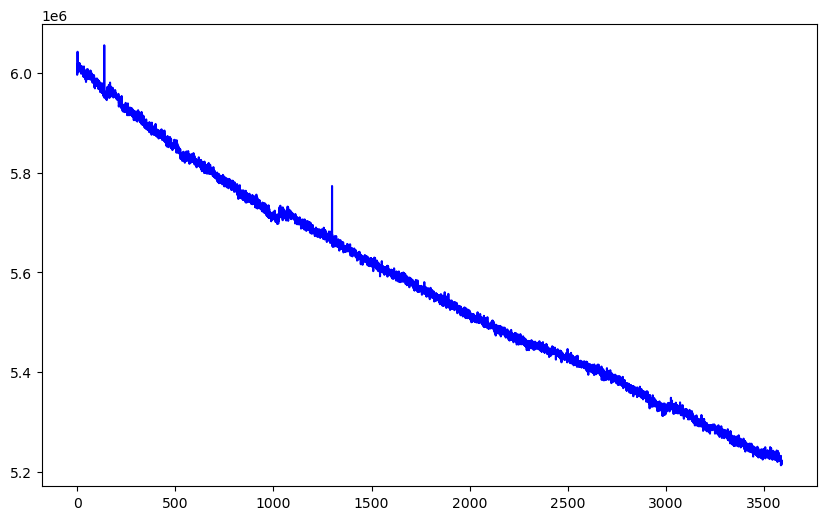

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pybats.analysis import analysis
from pybats.point_forecast import median

# Assuming df is your DataFrame with 'Time (s)', 'A', 'B', 'C' columns
# Ensure that 'Time (s)' is in seconds and starts from 0

# Function to prepare data for BSTS
def prepare_data_for_bsts(df, target_column):
    data = df[[target_column]].values
    return data

# Function to train BSTS model
def train_bsts(data):
    model, _ = analysis(data)
    return model

# Function to make predictions with BSTS model
def bsts_predict(bsts_model, forecast_length):
    forecast_samples = bsts_model.forecast_marginal(k=forecast_length)
    median_forecast = np.median(forecast_samples, axis=0)  # Use np.median to calculate median along the correct axis
    return median_forecast


# Define forecast length for BSTS
forecast_length_1hr = 3600  # 1 hour in seconds
forecast_length_2hr = 2 * forecast_length_1hr  # 2 hours in seconds

# Iterate over target columns
for target_column in ['A', 'B', 'C']:
    # Prepare data for BSTS
    data_bsts = prepare_data_for_bsts(df, target_column)

    # Train BSTS model
    bsts_model = train_bsts(data_bsts)

    # Make predictions with BSTS model for 1 hour
    bsts_predictions_1hr = bsts_predict(bsts_model, forecast_length_1hr)

    # Make predictions with BSTS model for 2 hours
    bsts_predictions_2hr = bsts_predict(bsts_model, forecast_length_2hr)

    # Plot results for 1 hour
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (s)'], df[target_column], label='Original Data', color='blue')
    plt.plot(df['Time (s)'] + np.arange(1, forecast_length_1hr + 1), bsts_predictions_1hr,
         label='BSTS Predictions (1 hour)', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and BSTS Predicted Data for {target_column} (1 hour)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot results for 2 hours
    plt.figure(figsize=(10, 6))
    #plt.plot(df['Time (s)'], df[target_column], label='Original Data', color='blue')
    plt.plot(df['Time (s)'] + np.arange(1, forecast_length_2hr + 1), bsts_predictions_2hr,
             label='BSTS Predictions (2 hours)', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and BSTS Predicted Data for {target_column} (2 hours)')
    plt.legend()
    plt.grid(True)
    plt.show()


## Ensemble Methods 

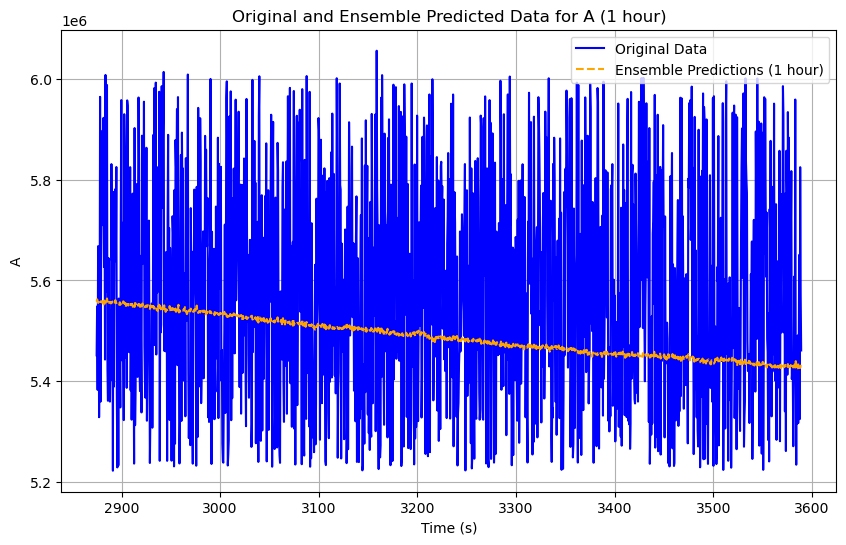

ValueError: x and y must have same first dimension, but have shapes (1430,) and (7150,)

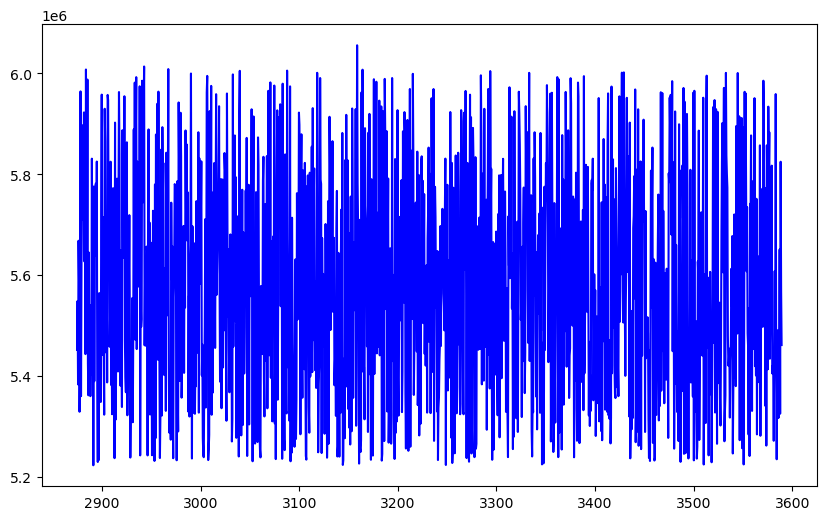

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with 'Time (s)', 'A', 'B', 'C' columns
# Ensure that 'Time (s)' is in seconds and starts from 0

# Function to prepare data for ensemble model
def prepare_data_for_ensemble(df, target_column, window_size=30):
    data = df[target_column].values
    X, y = [], []

    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])

    return np.array(X), np.array(y)

# Function to train ensemble model
def train_ensemble(X_train, y_train, n_estimators=100, max_depth=None):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    return model

# Function to make predictions with ensemble model
def ensemble_predict(model, X):
    return model.predict(X)

# Define window size for ensemble model
window_size = 30

# Define forecast length for ensemble model
forecast_length_1hr = 3600  # 1 hour in seconds
forecast_length_2hr = 2 * forecast_length_1hr  # 2 hours in seconds

# Iterate over target columns
for target_column in ['A', 'B', 'C']:
    # Prepare data for ensemble model
    X_ensemble, y_ensemble = prepare_data_for_ensemble(df, target_column, window_size=window_size)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_ensemble, y_ensemble, test_size=0.2, random_state=42)

    # Train ensemble model
    ensemble_model = train_ensemble(X_train, y_train)

    # Make predictions for 1 hour
    X_test_1hr = X_ensemble[-forecast_length_1hr:].reshape(-1, window_size)  # Use the last window_size data points for prediction
    y_pred_1hr = ensemble_predict(ensemble_model, X_test_1hr)

    # Make predictions for 2 hours
    X_test_2hr = X_ensemble[-forecast_length_2hr:].reshape(-1, window_size)  # Use the last window_size data points for prediction
    y_pred_2hr = ensemble_predict(ensemble_model, X_test_2hr)

    # Plot results for 1 hour
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (s)'][-len(y_test):], y_test, label='Original Data', color='blue')
    plt.plot(df['Time (s)'][-len(y_test):], y_pred_1hr[:len(y_test)], label='Ensemble Predictions (1 hour)', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Ensemble Predicted Data for {target_column} (1 hour)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot results for 2 hours
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (s)'][len(df) - len(y_test):], y_test, label='Original Data', color='blue')
    plt.plot(df['Time (s)'][len(df) - len(y_test):], y_pred_2hr, label='Ensemble Predictions (2 hours)', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Original and Ensemble Predicted Data for {target_column} (2 hours)')
    plt.legend()
    plt.grid(True)
    plt.show()


## Univariate vs. Multivariate Time Series 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df is your DataFrame with 'Time (s)', 'A', 'B', 'C' columns
# Ensure that 'Time (s)' is in seconds and starts from 0

# Function to prepare data for LSTM (Univariate)
def prepare_data_for_lstm_univariate(df, target_column, window_size=30):
    data = df[target_column].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    X, y = [], []

    for i in range(len(data_scaled) - window_size):
        X.append(data_scaled[i:i + window_size])
        y.append(data_scaled[i + window_size])

    return np.array(X), np.array(y), scaler

# Function to prepare data for LSTM (Multivariate)
def prepare_data_for_lstm_multivariate(df, target_columns, window_size=30):
    data = df[target_columns].values
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    X, y = [], []

    for i in range(len(data_scaled) - window_size):
        X.append(data_scaled[i:i + window_size])
        y.append(data_scaled[i + window_size])

    return np.array(X), np.array(y), scaler

# Function to train LSTM model
def train_lstm(X_train, y_train, window_size=30):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(window_size, X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, verbose=0)
    return model

# Function to make predictions with LSTM model
def lstm_predict(model, X, scaler):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    return predictions

# Define window size for LSTM
window_size = 30

# Iterate over target columns
for target_column in ['A', 'B', 'C']:
    # Univariate Time Series
    X_lstm_univariate, y_lstm_univariate, scaler_univariate = prepare_data_for_lstm_univariate(df, target_column, window_size=window_size)
    lstm_model_univariate = train_lstm(X_lstm_univariate, y_lstm_univariate, window_size=window_size)
    X_test_univariate = X_lstm_univariate[-1].reshape(1, window_size, 1)
    y_pred_univariate = lstm_predict(lstm_model_univariate, X_test_univariate, scaler_univariate)

    # Multivariate Time Series
    target_columns = ['Time (s)', 'A', 'B', 'C']
    X_lstm_multivariate, y_lstm_multivariate, scaler_multivariate = prepare_data_for_lstm_multivariate(df[target_columns], target_columns, window_size=window_size)
    lstm_model_multivariate = train_lstm(X_lstm_multivariate, y_lstm_multivariate, window_size=window_size)
    X_test_multivariate = X_lstm_multivariate[-1].reshape(1, window_size, len(target_columns))
    y_pred_multivariate = lstm_predict(lstm_model_multivariate, X_test_multivariate, scaler_multivariate)

    # Plot results for univariate LSTM
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (s)'], df[target_column], label='Original Data', color='blue')
    plt.plot(df['Time (s)'].iloc[-1] + np.arange(1, 2 * window_size + 1), y_pred_univariate.flatten(), label='Univariate LSTM Predictions (2 hours)', linestyle='--', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Univariate LSTM: Original and Predicted Data for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot results for multivariate LSTM
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (s)'], df[target_column], label='Original Data', color='blue')
    plt.plot(df['Time (s)'].iloc[-1] + np.arange(1, 2 * window_size + 1), y_pred_multivariate.flatten(), label='Multivariate LSTM Predictions (2 hours)', linestyle='--', color='green')
    plt.xlabel('Time (s)')
    plt.ylabel(target_column)
    plt.title(f'Multivariate LSTM: Original and Predicted Data for {target_column}')
    plt.legend()
    plt.grid(True)
    plt.show()


1/1 [==============================] - 0s 127ms/step


ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,4)